# Project 4.. Lets gooo... 

## LOAD THIS 

In [1]:
import requests
from bs4 import BeautifulSoup
from scrapy.selector import Selector
from scrapy.http import HtmlResponse
import time
import numpy as np
from fake_useragent import UserAgent #fakes that you are a normal user and not a bot
from selenium import webdriver
import pandas as pd
import re
import os
import csv
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import re


In [159]:
from nltk.tokenize import PunktSentenceTokenizer #segmentation
from nltk.stem import PorterStemmer #stemming
from nltk.corpus import stopwords #stopwords
from nltk.tag import pos_tag #parts of speech tagging
from nltk.tokenize import WordPunctTokenizer #parts of speech tagging
from sklearn.feature_extraction.text import HashingVectorizer, TfidfVectorizer #hashing #TF-IDF
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn import naive_bayes
from matplotlib.patches import Wedge
import matplotlib.patches as patches
from matplotlib.path import Path
from textblob import TextBlob
from gensim import corpora, models, matutils
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import defaultdict
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from nltk.corpus import stopwords

In [451]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

## END OF LOADING

## (1) Start of Scrapping

Roles that I want to scrape
1. data scientist, 
2. data science, 
3. data analyst, 
4. data analytics, 
5. business analytics, 
6. financial analytics, 
7. marketing analytics, 
8. data visualisation,
9.  data operations, 
10. data strategist, 
11. data engineer, 
12. data architect, 
13. data manager, 
14. data lead, 
15. data consultant, 
16. machine learning, 
17. deep learning, 
18. big data, 
19. business intelligence

In [17]:
# create the list of roles of what I want to scrap

dict = {'data_scientist': 'https://www.mycareersfuture.sg/search?search=data%20scientist&sortBy=new_posting_date&page={}',
        'data_science': 'https://www.mycareersfuture.sg/search?search=data%20science&sortBy=new_posting_date&page={}',
        'data_analyst': 'https://www.mycareersfuture.sg/search?search=data%20analyst&sortBy=new_posting_date&page={}',
        'data_analytics': 'https://www.mycareersfuture.sg/search?search=data%20analytics&sortBy=new_posting_date&page={}',
        'business_analytics': 'https://www.mycareersfuture.sg/search?search=business%20analytics&sortBy=new_posting_date&page={}',
        'financial_analytics': 'https://www.mycareersfuture.sg/search?search=financial%20analytics&sortBy=new_posting_date&page={}',
        'marketing_analytics': 'https://www.mycareersfuture.sg/search?search=marketing%20analytics&sortBy=new_posting_date&page={}',
        'data_visualisation': 'https://www.mycareersfuture.sg/search?search=data%20visualisation&sortBy=new_posting_date&page={}',
        'data_operations': 'https://www.mycareersfuture.sg/search?search=data%20operations&sortBy=new_posting_date&page={}',
        'data_strategist': 'https://www.mycareersfuture.sg/search?search=data%20strategist&sortBy=new_posting_date&page={}',
        'data_engineer': 'https://www.mycareersfuture.sg/search?search=data%20engineer&sortBy=new_posting_date&page={}',
        'data_architect': 'https://www.mycareersfuture.sg/search?search=data%20architect&sortBy=new_posting_date&page={}',
        'data_manager': 'https://www.mycareersfuture.sg/search?search=data%20manager&sortBy=new_posting_date&page={}',
        'data_lead': 'https://www.mycareersfuture.sg/search?search=data%20lead&sortBy=new_posting_date&page={}',
        'data_consultant': 'https://www.mycareersfuture.sg/search?search=data%20consultant&sortBy=new_posting_date&page={}',
        'machine_learning': 'https://www.mycareersfuture.sg/search?search=machine%20learning&sortBy=new_posting_date&page={}',
        'deep_learning': 'https://www.mycareersfuture.sg/search?search=deep%20learning&sortBy=new_posting_date&page={}',
        'big_data': 'https://www.mycareersfuture.sg/search?search=big%20data&sortBy=new_posting_date&page={}',
        'business_intelligence': 'https://www.mycareersfuture.sg/search?search=business%20intelligence&sortBy=new_posting_date&page={}'
       }
a = [[k,v] for k,v in dict.items()]
for k,v in dict.items():
    print(k)
    print(v)

data_scientist
https://www.mycareersfuture.sg/search?search=data%20scientist&sortBy=new_posting_date&page={}
data_science
https://www.mycareersfuture.sg/search?search=data%20science&sortBy=new_posting_date&page={}
data_analyst
https://www.mycareersfuture.sg/search?search=data%20analyst&sortBy=new_posting_date&page={}
data_analytics
https://www.mycareersfuture.sg/search?search=data%20analytics&sortBy=new_posting_date&page={}
business_analytics
https://www.mycareersfuture.sg/search?search=business%20analytics&sortBy=new_posting_date&page={}
financial_analytics
https://www.mycareersfuture.sg/search?search=financial%20analytics&sortBy=new_posting_date&page={}
marketing_analytics
https://www.mycareersfuture.sg/search?search=marketing%20analytics&sortBy=new_posting_date&page={}
data_visualisation
https://www.mycareersfuture.sg/search?search=data%20visualisation&sortBy=new_posting_date&page={}
data_operations
https://www.mycareersfuture.sg/search?search=data%20operations&sortBy=new_posting_da

In [173]:
# scrapping the links 

try:
    for k, v in dict.items():
        for page in range(0,100):
            link = []
            job_title = []
            company_name = []
            url = v
            chromedriver = "./chromedriver/chromedriver"
            os.environ["webdriver.chrome.driver"] = chromedriver
            driver = webdriver.Chrome(executable_path=chromedriver)

            print(url.format(page))
            driver.get(url.format(page))
            assert "MyCareersFuture" in driver.title
            time.sleep(np.random.normal(10,0.1))
            HTML = driver.page_source

            link = Selector(text=HTML).xpath('//div[@class="card relative"]/a/@href').extract() #needs to be an (a) for that row
            job_title = Selector(text=HTML).xpath('//h1[@name="job_title"]/text()').extract()
            company_name = Selector(text=HTML).xpath('//p[@name="company"]/text()').extract()
            if link == []:
                print("nothing found")
                break
            driver.close() 

            with open("./data_links_new2.csv", "a", newline="") as f:
                data = csv.writer(f)
                for i,job_link in enumerate(link):
                    data.writerow([k, url.format(page),job_title[i],job_link,company_name[i]])
                
except: 
    print("error")


https://www.mycareersfuture.sg/search?search=data%20scientist&sortBy=new_posting_date&page=0
https://www.mycareersfuture.sg/search?search=data%20scientist&sortBy=new_posting_date&page=1
https://www.mycareersfuture.sg/search?search=data%20scientist&sortBy=new_posting_date&page=2
https://www.mycareersfuture.sg/search?search=data%20scientist&sortBy=new_posting_date&page=3
https://www.mycareersfuture.sg/search?search=data%20scientist&sortBy=new_posting_date&page=4
https://www.mycareersfuture.sg/search?search=data%20scientist&sortBy=new_posting_date&page=5
https://www.mycareersfuture.sg/search?search=data%20scientist&sortBy=new_posting_date&page=6
nothing found
https://www.mycareersfuture.sg/search?search=data%20science&sortBy=new_posting_date&page=0
https://www.mycareersfuture.sg/search?search=data%20science&sortBy=new_posting_date&page=1
https://www.mycareersfuture.sg/search?search=data%20science&sortBy=new_posting_date&page=2
https://www.mycareersfuture.sg/search?search=data%20science&so

https://www.mycareersfuture.sg/search?search=machine%20learning&sortBy=new_posting_date&page=10
https://www.mycareersfuture.sg/search?search=machine%20learning&sortBy=new_posting_date&page=11
https://www.mycareersfuture.sg/search?search=machine%20learning&sortBy=new_posting_date&page=12
https://www.mycareersfuture.sg/search?search=machine%20learning&sortBy=new_posting_date&page=13
https://www.mycareersfuture.sg/search?search=machine%20learning&sortBy=new_posting_date&page=14
https://www.mycareersfuture.sg/search?search=machine%20learning&sortBy=new_posting_date&page=15
https://www.mycareersfuture.sg/search?search=machine%20learning&sortBy=new_posting_date&page=16
nothing found
https://www.mycareersfuture.sg/search?search=deep%20learning&sortBy=new_posting_date&page=0
https://www.mycareersfuture.sg/search?search=deep%20learning&sortBy=new_posting_date&page=1
https://www.mycareersfuture.sg/search?search=deep%20learning&sortBy=new_posting_date&page=2
https://www.mycareersfuture.sg/search?

In [344]:
# changing the dataframe
data_df = pd.read_csv('./data_links_new2.csv', 
                  names = ['search_key','search_link','role','job_link', 'company'])
data_df2 = data_df.sort_values(['job_link'])
#data_df2 = data_df2.reset_index()

print(data_df2.shape)
data_df2

(1900, 5)


,search_key,search_link,role,job_link,company
902,data_engineer,https://www.mycareersfuture.sg/search?search=d...,19WD32831 SAP Business System / Analyst,/job/19wd32831-sap-business-system-analyst-aut...,AUTODESK ASIA PTE. LTD.
482,data_analytics,https://www.mycareersfuture.sg/search?search=d...,19WD32831 SAP Business System / Analyst,/job/19wd32831-sap-business-system-analyst-aut...,AUTODESK ASIA PTE. LTD.
481,data_analytics,https://www.mycareersfuture.sg/search?search=d...,19WD32891 Engineering Manager,/job/19wd32891-engineering-manager-autodesk-as...,AUTODESK ASIA PTE. LTD.
643,data_analytics,https://www.mycareersfuture.sg/search?search=d...,Account Manager (E-Commerce),/job/account-manager-culina-4ee53d21dc4db94037...,CULINA PTE. LTD.
445,data_analytics,https://www.mycareersfuture.sg/search?search=d...,Account Manager,/job/account-manager-omd-singapore-a17a04a489d...,OMD SINGAPORE PTE. LTD.
602,data_analytics,https://www.mycareersfuture.sg/search?search=d...,Account Manager,/job/account-manager-omnicom-public-relations-...,OMNICOM PUBLIC RELATIONS GROUP PTE. LTD.
603,data_analytics,https://www.mycareersfuture.sg/search?search=d...,Account Manager,/job/account-manager-omnicom-public-relations-...,OMNICOM PUBLIC RELATIONS GROUP PTE. LTD.
1186,machine_learning,https://www.mycareersfuture.sg/search?search=m...,Actuarial Analyst,/job/actuarial-analyst-chubb-asia-pacific-524f...,CHUBB ASIA PACIFIC PTE. LTD.
844,data_operations,https://www.mycareersfuture.sg/search?search=d...,Ad Ops Lead,/job/ad-ops-lead-blis-media-pty-ce92b77283dc21...,ASPIRE GLOBAL NETWORK PTE. LTD.
831,data_visualisation,https://www.mycareersfuture.sg/search?search=d...,"Admin Assistant, Research Department (6 months...",/job/admin-assistant-research-department-resou...,RESOURCE VANTAGE


In [358]:
data_df2.shape

(1158, 6)

In [357]:
# Lets start dropping repeated stuff!
# This for loop looks at the job_link url and if the next link is the same as the previous one, it will be dropped. 
# Obviously, links are sorted in order first

link = 0
print(data_df2.shape)
data_df2.drop(['index'], axis = 1, inplace = True)
data_df2.reset_index(inplace = True)
for index, row in data_df2.iterrows():
    if row['job_link'] == link:
        print(data_df2.iloc[index,:])
        data_df2.drop(index, axis = 0, inplace = True)
    link = row['job_link']


(1158, 6)


In [359]:
# this is the final dataframe without repititons. Will use this and append it to a new csv just to keep a copy of the final version of links

print(data_df2.shape) 
data_df2.to_csv('data_links_clean3.csv')


(1158, 6)


## RERUN

In [360]:
# getting the full working link from the partial job_link scrapped by combining the root home website to the partial job link

data_df2['full_link'] = 'https://www.mycareersfuture.sg' + data_df2['job_link']
data_df2.loc[1,'full_link'] 
data_df2.head()

,index,search_key,search_link,role,job_link,company,full_link
0,0,data_engineer,https://www.mycareersfuture.sg/search?search=d...,19WD32831 SAP Business System / Analyst,/job/19wd32831-sap-business-system-analyst-aut...,AUTODESK ASIA PTE. LTD.,https://www.mycareersfuture.sg/job/19wd32831-s...
1,1,data_analytics,https://www.mycareersfuture.sg/search?search=d...,19WD32891 Engineering Manager,/job/19wd32891-engineering-manager-autodesk-as...,AUTODESK ASIA PTE. LTD.,https://www.mycareersfuture.sg/job/19wd32891-e...
2,2,data_analytics,https://www.mycareersfuture.sg/search?search=d...,Account Manager (E-Commerce),/job/account-manager-culina-4ee53d21dc4db94037...,CULINA PTE. LTD.,https://www.mycareersfuture.sg/job/account-man...
3,3,data_analytics,https://www.mycareersfuture.sg/search?search=d...,Account Manager,/job/account-manager-omd-singapore-a17a04a489d...,OMD SINGAPORE PTE. LTD.,https://www.mycareersfuture.sg/job/account-man...
4,4,data_analytics,https://www.mycareersfuture.sg/search?search=d...,Account Manager,/job/account-manager-omnicom-public-relations-...,OMNICOM PUBLIC RELATIONS GROUP PTE. LTD.,https://www.mycareersfuture.sg/job/account-man...


In [362]:
# Defining the function that will scrape the information that I need from each webpage and then append it to a CSV file

def extract_details(url):
    chromedriver = "./chromedriver/chromedriver"
    os.environ["webdriver.chrome.driver"] = chromedriver
    driver = webdriver.Chrome(executable_path=chromedriver)

    driver.get(url)
    assert "MyCareersFuture" in driver.title
    time.sleep(10)
    HTML = driver.page_source

    job_title = Selector(text=HTML).xpath('//h1[@id="job_title"]/text()').extract()
    company = Selector(text=HTML).xpath('//p[@class="f6 fw6 mv0 black-80 mr2 di ttu"]/text()').extract()
    salary_min = Selector(text=HTML).xpath('//span[@class="dib"][1]/text()').extract()
    salary_max = Selector(text=HTML).xpath('//span[@class="dib"][2]/text()').extract()
    period = Selector(text=HTML).xpath('//div[@class="salary tr-l"]/*/text()').extract()
    fulltime = Selector(text=HTML).xpath('//p[@id="employment_type"]/text()').extract()
    industry = Selector(text=HTML).xpath('//p[@id="job-categories"]/text()').extract() 
    seniority = Selector(text=HTML).xpath('//p[@id="seniority"]/text()').extract()
    exp = Selector(text=HTML).xpath('//p[@id="min_experience"]/text()').extract()
    role_desc = Selector(text=HTML).xpath('//div[@id="description-content"]//text()').extract()
    role_req1 = Selector(text=HTML).xpath('//div[@id="requirements-content"]//text()').extract() 
    role_req2 = Selector(text=HTML).xpath('//div[@id="requirements-content"]/*//text()').extract()
    driver.close() 

    with open("./job_details3.csv", "a", newline="") as f:
        data = csv.writer(f)
        data.writerow([data_df2.loc[i,'search_key'], url,job_title, company, salary_min, salary_max, period, fulltime, industry, seniority, exp, role_desc, role_req1, role_req2])

# will run a loop for each url that is in my dataframe

for i, each_url in enumerate(data_df2['full_link']):
    print(each_url)
    extract_details(each_url)



https://www.mycareersfuture.sg/job/19wd32831-sap-business-system-analyst-autodesk-asia-da0057eb4047d4662b5be1899a2e5ff6
https://www.mycareersfuture.sg/job/19wd32891-engineering-manager-autodesk-asia-8eda21ca54c933e9eb93080d5f7d105d
https://www.mycareersfuture.sg/job/account-manager-culina-4ee53d21dc4db94037ba3e9933368d89
https://www.mycareersfuture.sg/job/account-manager-omd-singapore-a17a04a489dccdc8c0790e366e127ef1
https://www.mycareersfuture.sg/job/account-manager-omnicom-public-relations-group-4233265831628114846007c29f197e28
https://www.mycareersfuture.sg/job/account-manager-omnicom-public-relations-group-ee0c1dd0b5662d42bf73b201ded29066
https://www.mycareersfuture.sg/job/actuarial-analyst-chubb-asia-pacific-524f06477678fa0d502b1be52c661bf3
https://www.mycareersfuture.sg/job/ad-ops-lead-blis-media-pty-ce92b77283dc216f62de6d7d0ee2ae6d
https://www.mycareersfuture.sg/job/admin-assistant-research-department-resource-vantage-35b2eaee5c4b39c26dc12ba3801a032e
https://www.mycareersfuture.

https://www.mycareersfuture.sg/job/associate-data-scientist-linksure-network-holding-980eb353d5e9a674caafe3e34640ee13
https://www.mycareersfuture.sg/job/associate-director-business-intelligence-investigations-kroll-associates-a042ce4930f3699ea52e242a21793f2d
https://www.mycareersfuture.sg/job/associate-director-enterprise-analytics-aia-singapore-9305aabd866d619e636db5c84f5c16e6
https://www.mycareersfuture.sg/job/associate-director-property-facility-services-9b20b1a545efa5e5be972933fefc9732
https://www.mycareersfuture.sg/job/associate-executive-data-analytics-office-kk-womens-childrens-hospital-a5956344719bd15bd134876cfb045d2e
https://www.mycareersfuture.sg/job/associate-financial-crime-analytics-%E2%80%93-transaction-surveillance-group-compliance--dbs-bank-5dd62747c013739db22cd1c382a92717
https://www.mycareersfuture.sg/job/associate-incentives-accounting-sabre-asia-pacific-508c90e574c543e0438530131b160b34
https://www.mycareersfuture.sg/job/associate-junior-data-scientist-dbs-transforma

https://www.mycareersfuture.sg/job/business-analyst-program-planning-professionals-90a3416f5009dce7ed21631a87a012fa
https://www.mycareersfuture.sg/job/business-analyst-tookitaki-holding-6ce49fa4fb668ce6b0e2f4d8c9464ba2
https://www.mycareersfuture.sg/job/business-analytics-insights-%E2%80%93-retail-bank-segments-sales-distribution-citibank-na-27a7073573a18744f9de38a1084070f6
https://www.mycareersfuture.sg/job/business-data-scientist-manpower-staffing-services-24413589f6178366ef180c69a105d996
https://www.mycareersfuture.sg/job/business-development-manager-cisco-systems-d187c4e2a1f0b151f05aea1a94891567
https://www.mycareersfuture.sg/job/business-insights-analyst-ntuc-enterprise-co-operative-00f418ace8971f7a8d7cb7c0733ddd70
https://www.mycareersfuture.sg/job/business-integrity-associate-technical-facebook-singapore-735ab11c9f14dc85c68e5488956de633
https://www.mycareersfuture.sg/job/business-intelligence-analyst-amazon-web-services-singapore-c9dbb7aa47aa9d5940c5cf40a7d44c26
https://www.myca

https://www.mycareersfuture.sg/job/data-analyst-powerbi-6-months-business-edge-personnel-services-b860b8f866066f6fbe700a411d733def
https://www.mycareersfuture.sg/job/data-analyst-quest-global-services-b00f0d4e1733ab44063674b7372f5ec6
https://www.mycareersfuture.sg/job/data-analyst-sciente-international-4754b25a7612ab91a5e32b0922f54ab6
https://www.mycareersfuture.sg/job/data-analyst-shipsfocus-intelligence-0763638ad2d04cb1da0ad7731ff72b0f
https://www.mycareersfuture.sg/job/data-analyst-simone-studios-e66dd0968e1bd6ab5b357d0930315c98
https://www.mycareersfuture.sg/job/data-analyst-singapore-google-asia-pacific-fb3f4ab2a24f0992c6947041e0ae57bf
https://www.mycareersfuture.sg/job/data-analyst-talentvis-singapore-da9baacb9e1e749bf136bb3c51e125bd
https://www.mycareersfuture.sg/job/data-analyst-u3-infotech-2bdb6b319ad69afb6745fdee3e3d2355
https://www.mycareersfuture.sg/job/data-analyst-viki-viki-31ea3806e6d565880e783372121f1d63
https://www.mycareersfuture.sg/job/data-analyst-zeemart-6f5145574d

https://www.mycareersfuture.sg/job/data-engineer-snaphunt-a38b7e4fc7c00027901160934f27a098
https://www.mycareersfuture.sg/job/data-engineer-sql-big-data-java-denodo-technologies-cfe51cc03bee7d249ecf83fde7a21e8d
https://www.mycareersfuture.sg/job/data-engineer-star-asia-trading-14710449bba9c2bc549481ca0cd46e63
https://www.mycareersfuture.sg/job/data-engineer-thales-solutions-asia-a61acadd3a13cabfa28cbd6ed9839dda
https://www.mycareersfuture.sg/job/data-engineer-twitter-asia-pacific-c6221099c428ae5fc4bfbfd1ff9f6301
https://www.mycareersfuture.sg/job/data-engineer-u3-infotech-59b309edf5f66b8a228d2c420e097c6d
https://www.mycareersfuture.sg/job/data-engineer-workato-5dd422fd941f66c1662bb2f4f31f3a87
https://www.mycareersfuture.sg/job/data-engineer-zave-technology-78cc7202accd0543cba338ff9a785456
https://www.mycareersfuture.sg/job/data-engineer-zenika-15edec0b30fd66464eafeabe29b3eac1
https://www.mycareersfuture.sg/job/data-engineering-lead-traveloka-services-821ed577153e2e4f286192dd005599c5
ht

https://www.mycareersfuture.sg/job/data-scientist-hewlett-packard-enterprise-singapore-f360b03db2fc29d10a6f6ca61138e385
https://www.mycareersfuture.sg/job/data-scientist-infocepts-f5ec58e8489a1fa90be0fd24f05dfd97
https://www.mycareersfuture.sg/job/data-scientist-lam-research-singapore-2131bff1d3918fd50df6b0c70b7151b4
https://www.mycareersfuture.sg/job/data-scientist-manpower-staffing-services-0679319f1b3cc752d35f4603b40ec803
https://www.mycareersfuture.sg/job/data-scientist-manpower-staffing-services-9dbd9a4ac51dc8c42bb598026a99827b
https://www.mycareersfuture.sg/job/data-scientist-merck-282468cd9f95fb3a2711b22f64ac37a4
https://www.mycareersfuture.sg/job/data-scientist-national-university-singapore-323cde1dc194484e8eb20970812fe55f
https://www.mycareersfuture.sg/job/data-scientist-niometrics-58df9d0a198b87cd09c6aafc33abc1b7
https://www.mycareersfuture.sg/job/data-scientist-ntuc-enterprise-co-operative-92cbf28222ce2531c00bde40613a16ad
https://www.mycareersfuture.sg/job/data-scientist-obs

https://www.mycareersfuture.sg/job/engineering-manager-isentia-brandtology-5cc8939894e926518743c3aab61d841f
https://www.mycareersfuture.sg/job/engineers-bioquest-advisory-2947f5f4c245e38a9f6dc5d6692ba72c
https://www.mycareersfuture.sg/job/entry-level-software-information-technology-trainees-0f373e74ba835349f10c24136777abce
https://www.mycareersfuture.sg/job/environmental-manager-assistant-blue-barrel-9ac7907b53775b35cb7c6674172b5507
https://www.mycareersfuture.sg/job/etl-developer-oversea-chinese-banking-corporation-fd80dff7c915e7eb11a70c1ee9ef5f41
https://www.mycareersfuture.sg/job/events-sales-manager-globaldata-33bf0214b5d79118c6fe553963dec231
https://www.mycareersfuture.sg/job/executive-43k-45k-pioneer-sap-business-one-networking-hardware-5-days-immediate-supreme-hr-advisory-38d894aa5b026b3f2596e7f595c794f7
https://www.mycareersfuture.sg/job/executive-43k-45k-pioneer-sap-business-one-networking-hardware-5-days-immediate-supreme-hr-advisory-b4fa790f1ca118f2f768ab3da463ce30
https://w

https://www.mycareersfuture.sg/job/implementation-engineer-tookitaki-holding-327b3a40dc10f03d51033659c90b1117
https://www.mycareersfuture.sg/job/industrial-data-analyst-ic-pro-og-technologies-54f97212692a7eb2121719d4cf958a5e
https://www.mycareersfuture.sg/job/industry-development-manager-i2r-astar-astar-research-entities-93ae7bd626aa378d2c3abe94ba8fbb3f
https://www.mycareersfuture.sg/job/information-system-manager-gmp-technologies-be5207f4e3f2e58688ddb80d1a38458f
https://www.mycareersfuture.sg/job/information-technology-executive-supreme-hr-advisory-454611945d17b75cd8bb5a21532f80f1
https://www.mycareersfuture.sg/job/information-technology-manager-68ea6346652471af1e17f61568e10d03
https://www.mycareersfuture.sg/job/information-technology-project-manager-works-consultancy-3bb8a815f8ae76472194c501841965b9
https://www.mycareersfuture.sg/job/information-technology-senior-research-scientist-gets-asia-507b8cb4d93f4b4ec372e2c36358b22a
https://www.mycareersfuture.sg/job/information-technology-sp

https://www.mycareersfuture.sg/job/machine-learning-engineer-21ec6d53351e294261f15037d9e1a794
https://www.mycareersfuture.sg/job/machine-learning-engineer-32c5dcda9a773f13d17643fe42dd8850
https://www.mycareersfuture.sg/job/machine-learning-zenika-206083188470c820d5fd136238fdb43f
https://www.mycareersfuture.sg/job/management-consultant-technology-pricewaterhousecoopers-consulting-44c8326cc962a457fa058ecfc1af6c0b
https://www.mycareersfuture.sg/job/management-manager-natureland-clinic-0e72d2d58ed8b22c437dea5c94abd256
https://www.mycareersfuture.sg/job/manager-66bfd8792132c11788198a968fb1e2f4
https://www.mycareersfuture.sg/job/manager-81274c4601042003906f67dfe52e2c93
https://www.mycareersfuture.sg/job/manager-93ad5f5abac816ab602492c90071b9f1
https://www.mycareersfuture.sg/job/manager-audit-631e81111e8a7278b54095bf688562ab
https://www.mycareersfuture.sg/job/manager-clinical-data-management-tessa-therapeutics-a3ce7789b91cde28adb575dbd7999f38
https://www.mycareersfuture.sg/job/manager-d067fa5

https://www.mycareersfuture.sg/job/operations-executive-193cbd9019b4567d875827a47219ba57
https://www.mycareersfuture.sg/job/operations-maintenance-engineer-nsl-oilchem-waste-management-f6bd7c0480e0c085939295c730c796e7
https://www.mycareersfuture.sg/job/operations-reg-control-ops-regulatory-ops-derivatives-regulatory-reporting-associate-goldman-sachs-services-3b55d7cee4421e7e847138d2a173630d
https://www.mycareersfuture.sg/job/operations-reg-control-ops-regulatory-ops-derivatives-regulatory-reporting-associate-goldman-sachs-services-a6208dd8d5b776d70f67ce582f911edb
https://www.mycareersfuture.sg/job/operations-regulatory-operations-derivatives-regulatory-reporting-executive-director-goldman-sachs-services-83d8e44a829314e7049ee5c07300486f
https://www.mycareersfuture.sg/job/operations-securities-division-operations-equities-trading-services-analyst-goldman-sachs-services-992f411b06a1037184141a8c2a7064ea
https://www.mycareersfuture.sg/job/operations-strategy-analyst-c9d35573d64ecfc1b34171ef

https://www.mycareersfuture.sg/job/quality-engineer-datarobot-singapore-f41348a9bbb277baee01d5194384acc9
https://www.mycareersfuture.sg/job/quant-analyst-bluechip-platforms-asia-99b455bdae1d0a6ee0f2e6feb32d43c2
https://www.mycareersfuture.sg/job/radar-rainfall-specialist-hydroinformatics-institute-f22212f4b44c991a2cf21e2b42a6146b
https://www.mycareersfuture.sg/job/recruitment-consultant-technology-nextwave-partners-df22fd42fabf4022137655acc4c0d3d0
https://www.mycareersfuture.sg/job/recuritment-consultant-manager-k-vin-employment-agency-dc5491ba91f5a5d34b2c477b8d51b095
https://www.mycareersfuture.sg/job/regional-healthcare-director-waggener-edstrom-worldwide-singapore-4c126d80114f20f0d5e844001b755ac0
https://www.mycareersfuture.sg/job/regional-marketing-manager-grabtaxi-holdings-54fee116f68fe38df5eed1d9f835b972
https://www.mycareersfuture.sg/job/regional-sales-operations-lead-apac-airbnb-singapore-836c61b74d9992e000ee37c0f92a66e6
https://www.mycareersfuture.sg/job/reporting-analyst-tele

https://www.mycareersfuture.sg/job/research-fellow-nanyang-technological-university-53e341703d2f6453b9654b3110f5b52c
https://www.mycareersfuture.sg/job/research-fellow-nanyang-technological-university-5eccb57346459ed3671ca55f25e3c755
https://www.mycareersfuture.sg/job/research-fellow-nanyang-technological-university-682268ed8b637142e272872089b059e6
https://www.mycareersfuture.sg/job/research-fellow-nanyang-technological-university-6b8442799cb022816e754f54f5afacf5
https://www.mycareersfuture.sg/job/research-fellow-nanyang-technological-university-b264d76325b8202695af5d42dd7e83f8
https://www.mycareersfuture.sg/job/research-fellow-nanyang-technological-university-d6749e3d6e1d5f180731237e37d646d8
https://www.mycareersfuture.sg/job/research-fellow-nanyang-technological-university-d8c78d775be5b7ad21a34890272bc209
https://www.mycareersfuture.sg/job/research-fellow-nanyang-technological-university-e46648d6a8ec7cebcee013f7eca9d741
https://www.mycareersfuture.sg/job/research-fellow-national-univ

https://www.mycareersfuture.sg/job/scientist-senior-scientist-astar-research-entities-5a6c4fcb4afa8cb203b852a304d9f432
https://www.mycareersfuture.sg/job/scrum-master-international-sos-technology-services-da3dc9fad3db4cdd651107f695d66886
https://www.mycareersfuture.sg/job/sea-associate-account-manager-media-starcom-media-worldwide-e36e6bd751b07424ee3dee836f17e6bf
https://www.mycareersfuture.sg/job/security-manager-gmp-recruitment-services-6f4668fd431a6cd48a9e8d61845f721e
https://www.mycareersfuture.sg/job/security-metrics-reporting-analyst-government-technology-agency-85ead6fb01ed2f101826f116bc8d7835
https://www.mycareersfuture.sg/job/security-operations-center-analyst-citibank-na-20d7a3f1a1771b0a4706070e52823d62
https://www.mycareersfuture.sg/job/security-researcher-acronis-asia-research-development-55ac3ef9275e1037eef71d9e0e307dfe
https://www.mycareersfuture.sg/job/senior-administrative-manager-76bca11335a7169cad0765fab14cce8b
https://www.mycareersfuture.sg/job/senior-adobe-google-an

https://www.mycareersfuture.sg/job/senior-digital-ad-operations-executive-bbc-global-news-singapore-ea9ecc21fb3418bd8aefc8dd313d22e4
https://www.mycareersfuture.sg/job/senior-engineer-830eaca35ee256619b6eb47f991866b8
https://www.mycareersfuture.sg/job/senior-engineer-cp-technology-743334d36541a2d6403004c0b2079d5c
https://www.mycareersfuture.sg/job/senior-engineer-mindcraft-singapore-b363e8128c8f1a214cea227838eae12b
https://www.mycareersfuture.sg/job/senior-engineer-rio-tinto-commercial-690ee52da7a13a131fe2ecd2adf7a5ac
https://www.mycareersfuture.sg/job/senior-enterprise-architect-tookitaki-holding-ed49cc0a22466aab0579f4aff03d2a97
https://www.mycareersfuture.sg/job/senior-executive-assistant-manager-nuhs-education-office-data-analytics-national-university-health-system-7f184ebe8d27ddc4888a4596bebafb7a
https://www.mycareersfuture.sg/job/senior-executive-executive-operations-agency-integrated-care-2009871e805b2fecbe391e690d336f47
https://www.mycareersfuture.sg/job/senior-executive-finance

https://www.mycareersfuture.sg/job/senior-software-engineer-affle-international-2663eb97941ceeaeb8f39923dad7c00a
https://www.mycareersfuture.sg/job/senior-software-engineer-isentia-brandtology-b301d54fc373181c41e07ca703d7292c
https://www.mycareersfuture.sg/job/senior-software-engineer-taiger-singapore-4775fe946a674faddb6adb27844e72f6
https://www.mycareersfuture.sg/job/senior-software-engineer-taiger-singapore-77536c1f72b3f088eb08c8a50164a80f
https://www.mycareersfuture.sg/job/senior-software-engineer-taiger-singapore-bb5ad54955634e171edafdeec906ff84
https://www.mycareersfuture.sg/job/senior-software-engineer-taiger-singapore-e3136188b9024670277d80bc2aa84780
https://www.mycareersfuture.sg/job/senior-solution-architect-tookitaki-holding-5f824c05e10766926246fa69c722be54
https://www.mycareersfuture.sg/job/senior-specialist-e-commerce-content-scoot-tigerair-4aca09a97580d583435ca13db13585a1
https://www.mycareersfuture.sg/job/senior-staff-technical-program-manager-general-electric-internation

https://www.mycareersfuture.sg/job/sr-cybersecurity-engineer-visa-worldwide-8e5cbe97ed41a79c0490d135c5fe0aa1
https://www.mycareersfuture.sg/job/sr-data-scientist-optimum-solutions-27a73532131a86d0259f97e0a64127d4
https://www.mycareersfuture.sg/job/sr-software-developer-streetsine-singapore-411dee4b420e0ce9b15337efa48113e8
https://www.mycareersfuture.sg/job/sr-systems-engineer-visa-worldwide-777c5d1494117cda26b90b012f33b0d8
https://www.mycareersfuture.sg/job/staff-software-engineer-twitter-asia-pacific-a917bd28f7fe6140a92d1d5e90cbc8f2
https://www.mycareersfuture.sg/job/strategic-director-groupm-asia-pacific-holdings-a73367b2b85d0f91d7faf178c10ff2a7
https://www.mycareersfuture.sg/job/strategic-marketing-analyst-scalable-marketing-solutions-singapore-google-asia-pacific-d8ec4190ccaf7277e4bc0f5528274165
https://www.mycareersfuture.sg/job/strategic-marketing-digital-lead-ntuc-link-11d579dc8641711d5595f7534479ac2e
https://www.mycareersfuture.sg/job/supply-chain-planning-anaylst-konica-minolt

https://www.mycareersfuture.sg/job/vp-data-innovation-lead-uob-asset-management-united-overseas-bank-8639bea5214677f300e5fd4647f6fbc4
https://www.mycareersfuture.sg/job/vp-enterprise-architect-tookitaki-holding-c60823196aa949516c01cd9d53b6c7ff
https://www.mycareersfuture.sg/job/vp-production-suppt-mgr-grp-consumer-bankg-big-data-analytics-tech-dbs-bank-b365d56a0946d4259e0a13b14939928d
https://www.mycareersfuture.sg/job/vp-program-manager-group-consumer-banking-big-data-analytics-technology-to-dbs-bank-6602aa10adf29c63667349a6a812d215
https://www.mycareersfuture.sg/job/vp-risk-control-institutional-banking-group-operations-technology-operations--dbs-bank-072059b2116c9dc31efe3fe6662b1885
https://www.mycareersfuture.sg/job/vp-sales-aspentech-dbe12dc833aac79f3ccccb02c491b983
https://www.mycareersfuture.sg/job/vp-sales-tookitaki-holding-e297cb742e4671bb44cf48036c6f122a
https://www.mycareersfuture.sg/job/vp-security-architect-group-consumer-banking-big-data-analytics-technology-to-dbs-bank-6

# Lets reload the csv

In [52]:
df2 = pd.read_csv('./job_details3.csv', index_col = False, 
                  names = ['search_key', 'url_link', 'role', 'company', 'salary_min', 'salary_max', 'period', 'perm_role', 'industry', 'seniority', 'years_exp', 'job_description', 'job_req1', 'job_req2'])
df2.head()

,search_key,url_link,role,company,salary_min,salary_max,period,perm_role,industry,seniority,years_exp,job_description,job_req1,job_req2
0,data_engineer,https://www.mycareersfuture.sg/job/19wd32831-s...,['19WD32831 SAP Business System / Analyst'],['AUTODESK ASIA PTE. LTD.'],"['$60,900']","['$121,800']",['Annually'],"['Permanent, Full Time']",['Information Technology'],['Professional'],['10 years exp'],"['Do what’s next', ' ', 'Would you like to Th...","['Minimum Qualifications', ' ', ' \t', 'Bache...","['Minimum Qualifications', ' \t', 'Bachelor’s ..."
1,data_engineer,https://www.mycareersfuture.sg/job/19wd32831-s...,['19WD32831 SAP Business System / Analyst'],['AUTODESK ASIA PTE. LTD.'],"['$60,900']","['$121,800']",['Annually'],"['Permanent, Full Time']",['Information Technology'],['Professional'],['10 years exp'],"['Do what’s next', ' ', 'Would you like to Th...","['Minimum Qualifications', ' ', ' \t', 'Bache...","['Minimum Qualifications', ' \t', 'Bachelor’s ..."
2,data_analytics,https://www.mycareersfuture.sg/job/19wd32891-e...,['19WD32891 Engineering Manager'],['AUTODESK ASIA PTE. LTD.'],"['$102,400']","['$204,800']",['Annually'],['Permanent'],['Information Technology'],['Manager'],['10 years exp'],"['Position Overview', ' ', 'Are you passionat...","['Minimum Qualifications', ' ', ' \t', '10+ y...","['Minimum Qualifications', ' \t', '10+ years o..."
3,data_analytics,https://www.mycareersfuture.sg/job/account-man...,['Account Manager (E-Commerce)'],['CULINA PTE. LTD.'],"['$3,000']","['$6,000']",['Monthly'],"['Permanent, Full Time']",['Sales / Retail '],['Manager'],[],"['As the e-Commerce Manager, you will be repor...","['Requirements:', ' ', ' \t', ""Candidate must...","['Requirements:', ' \t', ""Candidate must posse..."
4,data_analytics,https://www.mycareersfuture.sg/job/account-man...,['Account Manager'],['OMD SINGAPORE PTE. LTD.'],"['$5,000']","['$8,000']",['Monthly'],['Permanent'],['Advertising / Media '],['Manager'],['5 years exp'],"[""The Account\xa0Manager\xa0uses data analytic...",['~ Analyse data for business insights identif...,['~ Analyse data for business insights identif...


# lets do some data cleaning

In [53]:
#cleaning the weird list formatting for each cell + replace the blank cells with string "None" that is more easily identifiable

for each_col in df2.columns:
    df2[each_col] = [each_title.replace("['","") for each_title in df2[each_col]]
    df2[each_col] = [each_title.replace("']","") for each_title in df2[each_col]]
    df2[each_col] = [each_title.replace("[]","None") for each_title in df2[each_col]]
df2.head()
    

,search_key,url_link,role,company,salary_min,salary_max,period,perm_role,industry,seniority,years_exp,job_description,job_req1,job_req2
0,data_engineer,https://www.mycareersfuture.sg/job/19wd32831-s...,19WD32831 SAP Business System / Analyst,AUTODESK ASIA PTE. LTD.,"$60,900","$121,800",Annually,"Permanent, Full Time",Information Technology,Professional,10 years exp,"Do what’s next', ' ', 'Would you like to Thin...","Minimum Qualifications', ' ', ' \t', 'Bachelo...","Minimum Qualifications', ' \t', 'Bachelor’s De..."
1,data_engineer,https://www.mycareersfuture.sg/job/19wd32831-s...,19WD32831 SAP Business System / Analyst,AUTODESK ASIA PTE. LTD.,"$60,900","$121,800",Annually,"Permanent, Full Time",Information Technology,Professional,10 years exp,"Do what’s next', ' ', 'Would you like to Thin...","Minimum Qualifications', ' ', ' \t', 'Bachelo...","Minimum Qualifications', ' \t', 'Bachelor’s De..."
2,data_analytics,https://www.mycareersfuture.sg/job/19wd32891-e...,19WD32891 Engineering Manager,AUTODESK ASIA PTE. LTD.,"$102,400","$204,800",Annually,Permanent,Information Technology,Manager,10 years exp,"Position Overview', ' ', 'Are you passionate ...","Minimum Qualifications', ' ', ' \t', '10+ yea...","Minimum Qualifications', ' \t', '10+ years of ..."
3,data_analytics,https://www.mycareersfuture.sg/job/account-man...,Account Manager (E-Commerce),CULINA PTE. LTD.,"$3,000","$6,000",Monthly,"Permanent, Full Time",Sales / Retail,Manager,None,"As the e-Commerce Manager, you will be reporti...","Requirements:', ' ', ' \t', ""Candidate must p...","Requirements:', ' \t', ""Candidate must possess..."
4,data_analytics,https://www.mycareersfuture.sg/job/account-man...,Account Manager,OMD SINGAPORE PTE. LTD.,"$5,000","$8,000",Monthly,Permanent,Advertising / Media,Manager,5 years exp,"[""The Account\xa0Manager\xa0uses data analytic...",~ Analyse data for business insights identific...,~ Analyse data for business insights identific...


In [54]:
#cleaning salary

df2['salary_min'] = [salary1.replace("$","") for salary1 in df2['salary_min']]
df2['salary_min'] = [salary1.replace(",","") for salary1 in df2['salary_min']]
df2['salary_max'] = [salary1.replace("$","") for salary1 in df2['salary_max']]
df2['salary_max'] = [salary1.replace(",","") for salary1 in df2['salary_max']]

df2[['salary_min', 'salary_max']].head()

,salary_min,salary_max
0,60900,121800
1,60900,121800
2,102400,204800
3,3000,6000
4,5000,8000


In [55]:
df2['salary_min'].value_counts().head()
# lets drop the 'None' rows. Rationale is that this is used as a predictor hence rows without this value would be irrelevant


5000    147
None    104
4000     98
6000     88
3500     70
Name: salary_min, dtype: int64

In [56]:
print(df2.shape)
df2.drop(df2[df2['salary_min'] == 'None'].index, inplace = True)
print(df2.shape)

(1159, 14)
(1055, 14)


In [57]:
# changing the salary to numerical values + changing salary from monthly to annual

df2[['salary_min','salary_max']] = df2[['salary_min','salary_max']].astype('float')
df2[['salary_min']].info()
df2['period'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1055 entries, 0 to 1158
Data columns (total 1 columns):
salary_min    1055 non-null float64
dtypes: float64(1)
memory usage: 16.5 KB


Monthly     1008
Annually      47
Name: period, dtype: int64

In [58]:
# changing all salaries to be on an annual basis 

for i, row in df2.iterrows():
    if row['period'] == 'Monthly':
        df2.loc[i,'annual_salary_min'] = row['salary_min']*12
        df2.loc[i,'annual_salary_max'] = row['salary_max']*12
    elif row['period'] == 'Annually':
        df2.loc[i,'annual_salary_min'] = row['salary_min']
        df2.loc[i,'annual_salary_max'] = row['salary_max']
    else:
        print('error')
df2[['salary_min', 'salary_max', 'period', 'annual_salary_min', 'annual_salary_max']]


df3 = df2.drop(['salary_min','salary_max', 'period'], axis = 1)
df3['annual_salary_mean'] = (df3['annual_salary_min'] + df3['annual_salary_max'])/2

df3

,search_key,url_link,role,company,perm_role,industry,seniority,years_exp,job_description,job_req1,job_req2,annual_salary_min,annual_salary_max,annual_salary_mean
0,data_engineer,https://www.mycareersfuture.sg/job/19wd32831-s...,19WD32831 SAP Business System / Analyst,AUTODESK ASIA PTE. LTD.,"Permanent, Full Time",Information Technology,Professional,10 years exp,"Do what’s next', ' ', 'Would you like to Thin...","Minimum Qualifications', ' ', ' \t', 'Bachelo...","Minimum Qualifications', ' \t', 'Bachelor’s De...",60900.0,121800.0,91350.0
1,data_engineer,https://www.mycareersfuture.sg/job/19wd32831-s...,19WD32831 SAP Business System / Analyst,AUTODESK ASIA PTE. LTD.,"Permanent, Full Time",Information Technology,Professional,10 years exp,"Do what’s next', ' ', 'Would you like to Thin...","Minimum Qualifications', ' ', ' \t', 'Bachelo...","Minimum Qualifications', ' \t', 'Bachelor’s De...",60900.0,121800.0,91350.0
2,data_analytics,https://www.mycareersfuture.sg/job/19wd32891-e...,19WD32891 Engineering Manager,AUTODESK ASIA PTE. LTD.,Permanent,Information Technology,Manager,10 years exp,"Position Overview', ' ', 'Are you passionate ...","Minimum Qualifications', ' ', ' \t', '10+ yea...","Minimum Qualifications', ' \t', '10+ years of ...",102400.0,204800.0,153600.0
3,data_analytics,https://www.mycareersfuture.sg/job/account-man...,Account Manager (E-Commerce),CULINA PTE. LTD.,"Permanent, Full Time",Sales / Retail,Manager,None,"As the e-Commerce Manager, you will be reporti...","Requirements:', ' ', ' \t', ""Candidate must p...","Requirements:', ' \t', ""Candidate must possess...",36000.0,72000.0,54000.0
4,data_analytics,https://www.mycareersfuture.sg/job/account-man...,Account Manager,OMD SINGAPORE PTE. LTD.,Permanent,Advertising / Media,Manager,5 years exp,"[""The Account\xa0Manager\xa0uses data analytic...",~ Analyse data for business insights identific...,~ Analyse data for business insights identific...,60000.0,96000.0,78000.0
5,data_analytics,https://www.mycareersfuture.sg/job/account-man...,Account Manager,OMNICOM PUBLIC RELATIONS GROUP PTE. LTD.,Permanent,Marketing / Public Relations,Manager,None,"\xa0', ' ', '\xa0', ' ', '\xa0', ' ', '\xa0...","What you’ll need', ' ', ' \t', 'Four to seven...","What you’ll need', ' \t', 'Four to seven (4-7)...",57600.0,66000.0,61800.0
6,data_analytics,https://www.mycareersfuture.sg/job/account-man...,Account Manager,OMNICOM PUBLIC RELATIONS GROUP PTE. LTD.,Permanent,Marketing / Public Relations,Middle Management,None,Omnicom Public Relations Group is a global col...,"What you’ll do ', ' ', ' \t', 'Develop and im...","What you’ll do ', ' \t', 'Develop and implemen...",60000.0,84000.0,72000.0
7,machine_learning,https://www.mycareersfuture.sg/job/actuarial-a...,Actuarial Analyst,CHUBB ASIA PACIFIC PTE. LTD.,Full Time,Insurance,Manager,4 years exp,"Key Objectives', ' ', 'This position will bri...","Desired Qualifications', ' ', ' \t', 'BS degr...","Desired Qualifications', ' \t', 'BS degree or ...",125000.0,150000.0,137500.0
8,data_operations,https://www.mycareersfuture.sg/job/ad-ops-lead...,Ad Ops Lead,ASPIRE GLOBAL NETWORK PTE. LTD.,Permanent,Advertising / Media,Senior Management,6 years exp,"Ad Ops Lead', ' ', ""Aspire is working with on...","You will have.. ', ' ', ' ', 'At least 6 ye...","You will have.. ', ' ', 'At least 6 years of...",72000.0,120000.0,96000.0
11,deep_learning,https://www.mycareersfuture.sg/job/ai-computer...,AI Computer Vision Engineer,ASUS GLOBAL PTE. LTD.,Permanent,Engineering,Senior Executive,5 years exp,1. Machine learning and Deep learning algorith...,1. Bachelor Degree in Computer Science or rela...,1. Bachelor Degree in Computer Science or rela...,54000.0,120000.0,87000.0


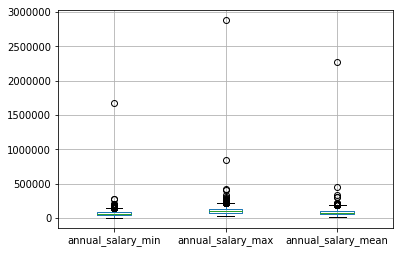

In [59]:
# seeing the salary based on a boxplot

df3[['annual_salary_min','annual_salary_max', 'annual_salary_mean']].boxplot()

# there are 2 or 3 more than $150k that is skewing the plot

In [60]:
# drop the outlier

print(df3[df3['annual_salary_mean'] > 250000])

# the range for the Samsung role is too wide from $60k to $840k just doesnt make sense. Will drop this. 
# For the other 2, even though they are high but the range between their salary_min and salary_max is reasonable. Hence will not drop them

df3.drop([55,848], axis = 0, inplace = True) #55 has too big a range and #848 is probably an error $140k/month doesnt make sense 
print(df3[df3['annual_salary_mean'] > 250000])

                 search_key  \
55    business_intelligence   
627   business_intelligence   
848            data_science   
1067               big_data   
1152               big_data   

                                               url_link  \
55    https://www.mycareersfuture.sg/job/assistant-m...   
627   https://www.mycareersfuture.sg/job/managerial-...   
848   https://www.mycareersfuture.sg/job/sales-opera...   
1067  https://www.mycareersfuture.sg/job/solutions-a...   
1152  https://www.mycareersfuture.sg/job/vp-sales-as...   

                                                   role  \
55                          Assistant Manager / Manager   
627                      MANAGERIAL / SENIOR MANAGEMENT   
848   Sales Operations Manager - Strategy and Planni...   
1067                     SOLUTIONS ARCHITECTURE MANAGER   
1152                                          VP, Sales   

                                            company             perm_role  \
55               SAMSUNG S

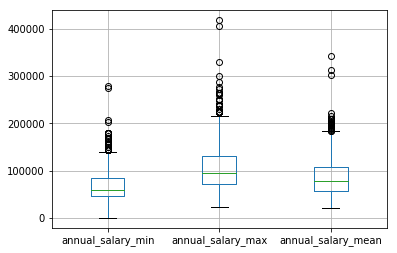

In [61]:
df3[['annual_salary_min','annual_salary_max', 'annual_salary_mean']].boxplot() # ok this is not ideal but better

/Users/nicholastay/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


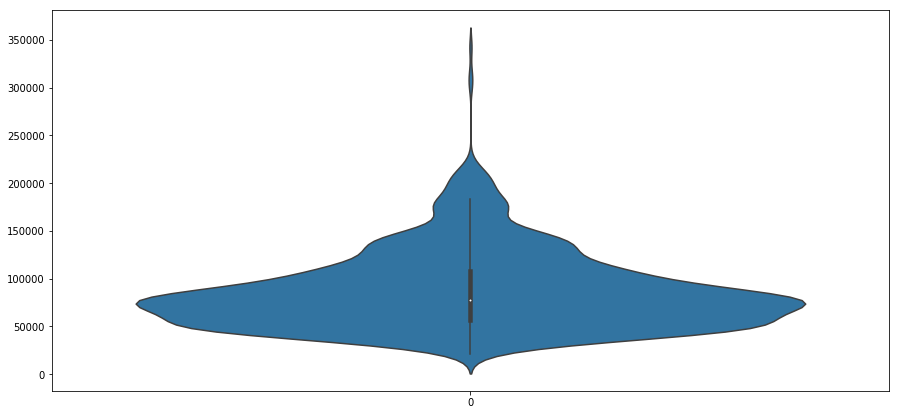

In [62]:
# lets visualize this in a violin plot
fig = plt.figure(figsize=(15,7))
sns.violinplot(data=df3['annual_salary_mean'])
# most salaries are ~70,000 a year. Over 200,000 is top of the range and there are a few outliers
# ok enough with salaries

In [63]:
df3.head()

,search_key,url_link,role,company,perm_role,industry,seniority,years_exp,job_description,job_req1,job_req2,annual_salary_min,annual_salary_max,annual_salary_mean
0,data_engineer,https://www.mycareersfuture.sg/job/19wd32831-s...,19WD32831 SAP Business System / Analyst,AUTODESK ASIA PTE. LTD.,"Permanent, Full Time",Information Technology,Professional,10 years exp,"Do what’s next', ' ', 'Would you like to Thin...","Minimum Qualifications', ' ', ' \t', 'Bachelo...","Minimum Qualifications', ' \t', 'Bachelor’s De...",60900.0,121800.0,91350.0
1,data_engineer,https://www.mycareersfuture.sg/job/19wd32831-s...,19WD32831 SAP Business System / Analyst,AUTODESK ASIA PTE. LTD.,"Permanent, Full Time",Information Technology,Professional,10 years exp,"Do what’s next', ' ', 'Would you like to Thin...","Minimum Qualifications', ' ', ' \t', 'Bachelo...","Minimum Qualifications', ' \t', 'Bachelor’s De...",60900.0,121800.0,91350.0
2,data_analytics,https://www.mycareersfuture.sg/job/19wd32891-e...,19WD32891 Engineering Manager,AUTODESK ASIA PTE. LTD.,Permanent,Information Technology,Manager,10 years exp,"Position Overview', ' ', 'Are you passionate ...","Minimum Qualifications', ' ', ' \t', '10+ yea...","Minimum Qualifications', ' \t', '10+ years of ...",102400.0,204800.0,153600.0
3,data_analytics,https://www.mycareersfuture.sg/job/account-man...,Account Manager (E-Commerce),CULINA PTE. LTD.,"Permanent, Full Time",Sales / Retail,Manager,None,"As the e-Commerce Manager, you will be reporti...","Requirements:', ' ', ' \t', ""Candidate must p...","Requirements:', ' \t', ""Candidate must possess...",36000.0,72000.0,54000.0
4,data_analytics,https://www.mycareersfuture.sg/job/account-man...,Account Manager,OMD SINGAPORE PTE. LTD.,Permanent,Advertising / Media,Manager,5 years exp,"[""The Account\xa0Manager\xa0uses data analytic...",~ Analyse data for business insights identific...,~ Analyse data for business insights identific...,60000.0,96000.0,78000.0


In [64]:
# lets drop repeated rows. I still see some repeats

df3.sort_values(by = ['company','role','annual_salary_mean'])

,search_key,url_link,role,company,perm_role,industry,seniority,years_exp,job_description,job_req1,job_req2,annual_salary_min,annual_salary_max,annual_salary_mean
648,machine_learning,https://www.mycareersfuture.sg/job/mobile-soft...,Mobile Software Engineer,101 DIGITAL PTE. LTD.,Full Time,"Banking and Finance, Information Technology",Professional,None,101 Digital is\xa0a Digital Transformation con...,101 Digital is looking for a Mobile Developer ...,101 Digital is looking for a Mobile Developer ...,60000.0,90000.0,75000.0
658,machine_learning,https://www.mycareersfuture.sg/job/open-bankin...,Open Banking & Platform Engineer,101 DIGITAL PTE. LTD.,Full Time,"Banking and Finance, Information Technology",Professional,None,101 Digital is\xa0a Digital Transformation con...,101 Digital is looking for a Software Engineer...,101 Digital is looking for a Software Engineer...,60000.0,78000.0,69000.0
990,machine_learning,https://www.mycareersfuture.sg/job/senior-open...,Senior Open Banking & Platform Engineer,101 DIGITAL PTE. LTD.,Full Time,"Banking and Finance, Information Technology",Professional,None,101 Digital is\xa0a Digital Transformation con...,101 Digital is looking for Senior Software Eng...,101 Digital is looking for Senior Software Eng...,60000.0,96000.0,78000.0
194,data_analyst,https://www.mycareersfuture.sg/job/data-analys...,Data Analyst,99 PTE. LTD.,"Permanent, Full Time",Engineering,Junior Executive,None,99.co is looking for a Data Analyst to join ou...,"What you are/have/will be:', ' ', ' ', '2-3...","What you are/have/will be:', ' ', '2-3 years...",43200.0,48000.0,45600.0
906,data_analyst,https://www.mycareersfuture.sg/job/senior-data...,Senior Data Analyst,99 PTE. LTD.,"Permanent, Full Time",Engineering,"Professional, Executive, Senior Executive",None,99.co is looking for a Senior Data Analyst to ...,"What you are/have/will be:', ' ', ' ', '4-6...","What you are/have/will be:', ' ', '4-6\xa0ye...",66000.0,90000.0,78000.0
125,deep_learning,https://www.mycareersfuture.sg/job/bii-postdoc...,"BII, Postdoctoral Research fellow",A*STAR RESEARCH ENTITIES,"Contract, Full Time",Sciences / Laboratory / R&D,Professional,1 year exp,We are hiring PhD and non-PhD degree holders i...,PHD,PHD,54000.0,108000.0,81000.0
486,big_data,https://www.mycareersfuture.sg/job/gis-bioinfo...,GIS - Bioinformatics Specialist / Senior Bioin...,A*STAR RESEARCH ENTITIES,"Contract, Full Time",Sciences / Laboratory / R&D,Non-executive,None,We are seeking a candidate for the role of dat...,"', 'Bachelor or Master degree in Computatio...","', 'Bachelor or Master degree in Computatio...",30000.0,60000.0,45000.0
519,big_data,https://www.mycareersfuture.sg/job/industry-de...,"Industry Development Manager, I2R / A*STAR",A*STAR RESEARCH ENTITIES,"Contract, Full Time",Sciences / Laboratory / R&D,Manager,None,About the Institute for Infocomm Research (I²R...,"', 'Minimum a Bachelor degree in Engineering...","', 'Minimum a Bachelor degree in Engineering...",68400.0,136800.0,102600.0
770,data_analytics,https://www.mycareersfuture.sg/job/research-en...,Research Engineer (Cyber Security&Intelligence...,A*STAR RESEARCH ENTITIES,"Contract, Full Time",Sciences / Laboratory / R&D,Professional,None,About the Institute for Infocomm Research (I²R...,"\xa0', ' ', ' ', ' ', 'Minimum Bachelor deg...","\xa0', ' ', ' ', 'Minimum Bachelor degree in...",30000.0,60000.0,45000.0
771,machine_learning,https://www.mycareersfuture.sg/job/research-en...,Research Engineer (Cyber Security&Intelligence...,A*STAR RESEARCH ENTITIES,"Contract, Full Time",Sciences / Laboratory / R&D,Professional,None,About the Institute for Infocomm Research (I²R...,"\xa0', ' ', ' ', ' ', 'Minimum Bachelor Deg...","\xa0', ' ', ' ', 'Minimum Bachelor Degree in...",30000.0,60000.0,45000.0


In [66]:
# If the company is the same, the role is the same and the annual_salary is the same, it probably means that the role is repeated

previous_role = ''
previous_company = ''
previous_salary = 0
print(df3.shape)
#df3.reset_index(inplace=True)
for index, row in df3.iterrows():
    if row['company'] == previous_company:
        if row['role'] == previous_role:
            if row['annual_salary_mean'] == previous_salary:
                df3.drop(index, axis = 0, inplace = True)
                print(index)
    previous_company = row['company']
    previous_role = row['role']
    previous_salary = row['annual_salary_mean']
print(df3.shape)


(974, 14)
(974, 14)


In [70]:
# remove underscore in search_key

df3['search_key'] = [key.replace('_',' ') for key in df3['search_key']]
df3.head()

,search_key,url_link,role,company,perm_role,industry,seniority,years_exp,job_description,job_req1,job_req2,annual_salary_min,annual_salary_max,annual_salary_mean
0,data engineer,https://www.mycareersfuture.sg/job/19wd32831-s...,19WD32831 SAP Business System / Analyst,AUTODESK ASIA PTE. LTD.,"Permanent, Full Time",Information Technology,Professional,10 years exp,"Do what’s next', ' ', 'Would you like to Thin...","Minimum Qualifications', ' ', ' \t', 'Bachelo...","Minimum Qualifications', ' \t', 'Bachelor’s De...",60900.0,121800.0,91350.0
2,data analytics,https://www.mycareersfuture.sg/job/19wd32891-e...,19WD32891 Engineering Manager,AUTODESK ASIA PTE. LTD.,Permanent,Information Technology,Manager,10 years exp,"Position Overview', ' ', 'Are you passionate ...","Minimum Qualifications', ' ', ' \t', '10+ yea...","Minimum Qualifications', ' \t', '10+ years of ...",102400.0,204800.0,153600.0
3,data analytics,https://www.mycareersfuture.sg/job/account-man...,Account Manager (E-Commerce),CULINA PTE. LTD.,"Permanent, Full Time",Sales / Retail,Manager,None,"As the e-Commerce Manager, you will be reporti...","Requirements:', ' ', ' \t', ""Candidate must p...","Requirements:', ' \t', ""Candidate must possess...",36000.0,72000.0,54000.0
4,data analytics,https://www.mycareersfuture.sg/job/account-man...,Account Manager,OMD SINGAPORE PTE. LTD.,Permanent,Advertising / Media,Manager,5 years exp,"[""The Account\xa0Manager\xa0uses data analytic...",~ Analyse data for business insights identific...,~ Analyse data for business insights identific...,60000.0,96000.0,78000.0
5,data analytics,https://www.mycareersfuture.sg/job/account-man...,Account Manager,OMNICOM PUBLIC RELATIONS GROUP PTE. LTD.,Permanent,Marketing / Public Relations,Manager,None,"\xa0', ' ', '\xa0', ' ', '\xa0', ' ', '\xa0...","What you’ll need', ' ', ' \t', 'Four to seven...","What you’ll need', ' \t', 'Four to seven (4-7)...",57600.0,66000.0,61800.0


In [75]:
# lets look at role and company for a bunch of rows and convert them to lowercase
df3[['role','company']] = df3[['role','company']].apply(lambda x: x.astype(str).str.lower())
df3[['role','company']]

,role,company
0,19wd32831 sap business system / analyst,autodesk asia pte. ltd.
2,19wd32891 engineering manager,autodesk asia pte. ltd.
3,account manager (e-commerce),culina pte. ltd.
4,account manager,omd singapore pte. ltd.
5,account manager,omnicom public relations group pte. ltd.
6,account manager,omnicom public relations group pte. ltd.
7,actuarial analyst,chubb asia pacific pte. ltd.
8,ad ops lead,aspire global network pte. ltd.
11,ai computer vision engineer,asus global pte. ltd.
12,algorithm engineer,envision digital international pte. ltd.


In [102]:
# lets remove the numbers in the roles and company that don't make sense

df3['role'] = df3['role'].apply(lambda x: re.sub(r'[0-9]+', '', x))
df3['company'] = df3['company'].apply(lambda x: re.sub(r'[0-9]+', '', x))
df3[['role','company']].head()

,role,company
0,wd sap business system / analyst,autodesk asia pte. ltd.
2,wd engineering manager,autodesk asia pte. ltd.
3,account manager (e-commerce),culina pte. ltd.
4,account manager,omd singapore pte. ltd.
5,account manager,omnicom public relations group pte. ltd.


In [124]:
# trying to plot the salaries of the top 20 companies

top_20 = df3['company'].value_counts()[:20]
df4 = df3[df3['company'].isin(top_20.index[1:])]

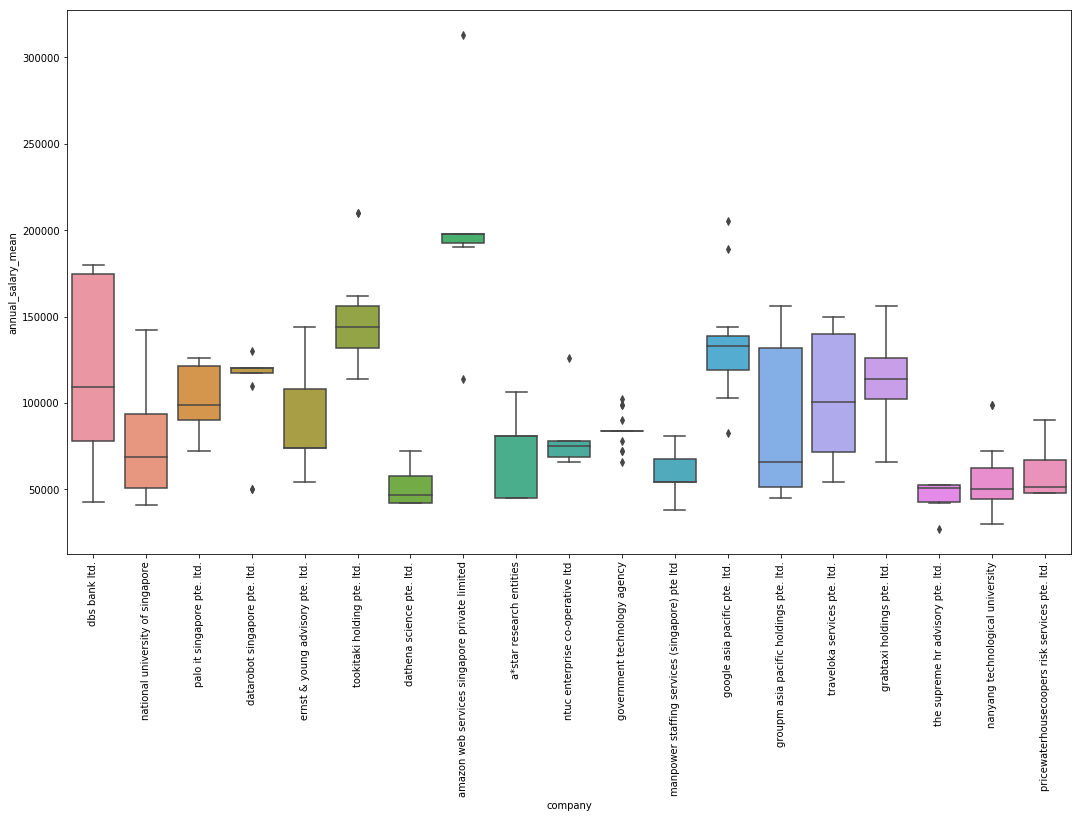

In [139]:
# plotting 

fig = plt.figure(figsize=(18,10))

ax = sns.boxplot(x='company', y = 'annual_salary_mean', data = df4)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

# Insights

1. Amazon pays significantly more than other companies
2. DBS is hiring alot of positions in this data space
3. Tookitaki and google seems to be paying on average more than the rest of the companies for data related positions

In [ ]:
# I want to do further cleaning but also want to see how much more changes I need to make to the model. 

In [140]:
# Lets create a df for a quick model

# dropping job_req2 because it is a repeat of job_req1

df3.drop('job_req2', axis = 1, inplace = True)
df3.reset_index(inplace=True, drop=True)
df3.head()

,search_key,url_link,role,company,perm_role,industry,seniority,years_exp,job_description,job_req1,annual_salary_min,annual_salary_max,annual_salary_mean
0,data engineer,https://www.mycareersfuture.sg/job/19wd32831-s...,wd sap business system / analyst,autodesk asia pte. ltd.,"Permanent, Full Time",Information Technology,Professional,10 years exp,"Do what’s next', ' ', 'Would you like to Thin...","Minimum Qualifications', ' ', ' \t', 'Bachelo...",60900.0,121800.0,91350.0
1,data analytics,https://www.mycareersfuture.sg/job/19wd32891-e...,wd engineering manager,autodesk asia pte. ltd.,Permanent,Information Technology,Manager,10 years exp,"Position Overview', ' ', 'Are you passionate ...","Minimum Qualifications', ' ', ' \t', '10+ yea...",102400.0,204800.0,153600.0
2,data analytics,https://www.mycareersfuture.sg/job/account-man...,account manager (e-commerce),culina pte. ltd.,"Permanent, Full Time",Sales / Retail,Manager,None,"As the e-Commerce Manager, you will be reporti...","Requirements:', ' ', ' \t', ""Candidate must p...",36000.0,72000.0,54000.0
3,data analytics,https://www.mycareersfuture.sg/job/account-man...,account manager,omd singapore pte. ltd.,Permanent,Advertising / Media,Manager,5 years exp,"[""The Account\xa0Manager\xa0uses data analytic...",~ Analyse data for business insights identific...,60000.0,96000.0,78000.0
4,data analytics,https://www.mycareersfuture.sg/job/account-man...,account manager,omnicom public relations group pte. ltd.,Permanent,Marketing / Public Relations,Manager,None,"\xa0', ' ', '\xa0', ' ', '\xa0', ' ', '\xa0...","What you’ll need', ' ', ' \t', 'Four to seven...",57600.0,66000.0,61800.0


In [141]:
# drop years_exp, salary_min and salary_max
df3.drop('years_exp', axis = 1, inplace = True)
df3.drop(['annual_salary_min','annual_salary_max'], axis = 1, inplace = True)

df3.head()

,search_key,url_link,role,company,perm_role,industry,seniority,job_description,job_req1,annual_salary_mean
0,data engineer,https://www.mycareersfuture.sg/job/19wd32831-s...,wd sap business system / analyst,autodesk asia pte. ltd.,"Permanent, Full Time",Information Technology,Professional,"Do what’s next', ' ', 'Would you like to Thin...","Minimum Qualifications', ' ', ' \t', 'Bachelo...",91350.0
1,data analytics,https://www.mycareersfuture.sg/job/19wd32891-e...,wd engineering manager,autodesk asia pte. ltd.,Permanent,Information Technology,Manager,"Position Overview', ' ', 'Are you passionate ...","Minimum Qualifications', ' ', ' \t', '10+ yea...",153600.0
2,data analytics,https://www.mycareersfuture.sg/job/account-man...,account manager (e-commerce),culina pte. ltd.,"Permanent, Full Time",Sales / Retail,Manager,"As the e-Commerce Manager, you will be reporti...","Requirements:', ' ', ' \t', ""Candidate must p...",54000.0
3,data analytics,https://www.mycareersfuture.sg/job/account-man...,account manager,omd singapore pte. ltd.,Permanent,Advertising / Media,Manager,"[""The Account\xa0Manager\xa0uses data analytic...",~ Analyse data for business insights identific...,78000.0
4,data analytics,https://www.mycareersfuture.sg/job/account-man...,account manager,omnicom public relations group pte. ltd.,Permanent,Marketing / Public Relations,Manager,"\xa0', ' ', '\xa0', ' ', '\xa0', ' ', '\xa0...","What you’ll need', ' ', ' \t', 'Four to seven...",61800.0


In [147]:
df3['job_combine'] = df3['job_description'] + df3['job_req1']
df3.drop(['job_description','job_req1'], axis = 1, inplace = True)
df3.head()

,search_key,url_link,role,company,perm_role,industry,seniority,annual_salary_mean,job_combine
0,data engineer,https://www.mycareersfuture.sg/job/19wd32831-s...,wd sap business system / analyst,autodesk asia pte. ltd.,"Permanent, Full Time",Information Technology,Professional,91350.0,"Do what’s next', ' ', 'Would you like to Thin..."
1,data analytics,https://www.mycareersfuture.sg/job/19wd32891-e...,wd engineering manager,autodesk asia pte. ltd.,Permanent,Information Technology,Manager,153600.0,"Position Overview', ' ', 'Are you passionate ..."
2,data analytics,https://www.mycareersfuture.sg/job/account-man...,account manager (e-commerce),culina pte. ltd.,"Permanent, Full Time",Sales / Retail,Manager,54000.0,"As the e-Commerce Manager, you will be reporti..."
3,data analytics,https://www.mycareersfuture.sg/job/account-man...,account manager,omd singapore pte. ltd.,Permanent,Advertising / Media,Manager,78000.0,"[""The Account\xa0Manager\xa0uses data analytic..."
4,data analytics,https://www.mycareersfuture.sg/job/account-man...,account manager,omnicom public relations group pte. ltd.,Permanent,Marketing / Public Relations,Manager,61800.0,"\xa0', ' ', '\xa0', ' ', '\xa0', ' ', '\xa0..."


In [148]:
df3.drop(['url_link'], axis = 1, inplace = True)

# Quick model first

Lets do what edo says and try and plot this first... If the results are bad, we can go back to modelling thereafter

In [149]:
# Lets create another df for this

df_test = df3.copy()
df_test.head()

,search_key,role,company,perm_role,industry,seniority,annual_salary_mean,job_combine
0,data engineer,wd sap business system / analyst,autodesk asia pte. ltd.,"Permanent, Full Time",Information Technology,Professional,91350.0,"Do what’s next', ' ', 'Would you like to Thin..."
1,data analytics,wd engineering manager,autodesk asia pte. ltd.,Permanent,Information Technology,Manager,153600.0,"Position Overview', ' ', 'Are you passionate ..."
2,data analytics,account manager (e-commerce),culina pte. ltd.,"Permanent, Full Time",Sales / Retail,Manager,54000.0,"As the e-Commerce Manager, you will be reporti..."
3,data analytics,account manager,omd singapore pte. ltd.,Permanent,Advertising / Media,Manager,78000.0,"[""The Account\xa0Manager\xa0uses data analytic..."
4,data analytics,account manager,omnicom public relations group pte. ltd.,Permanent,Marketing / Public Relations,Manager,61800.0,"\xa0', ' ', '\xa0', ' ', '\xa0', ' ', '\xa0..."


In [156]:
#lets model! Finally! Lets try just with the job_combine (ie role description and requirements column)

y1 = df_test[['annual_salary_mean']]
X1 = df_test[['job_combine']]

cvt = CountVectorizer(stop_words="english",lowercase=True, strip_accents="unicode", max_features = 2000, min_df = 5,max_df = 0.7, ngram_range = (1,2))
X_all = cvt.fit_transform(X1['job_combine'])
columns  =  np.array(cvt.get_feature_names())
nlp = pd.DataFrame(cvt.transform(X1['job_combine']).todense(), columns = cvt.get_feature_names())
print(nlp.shape)

(974, 2000)


In [157]:
def get_freq_words(sparse_counts, columns):
    # X_all is a sparse matrix, so sum() returns a 'matrix' datatype ...
    #   which we then convert into a 1-D ndarray for sorting
    word_counts = np.asarray(X_all.sum(axis=0)).reshape(-1)

    # argsort() returns smallest first, so we reverse the result
    largest_count_indices = word_counts.argsort()[::-1]

    # pretty-print the results! Remember to always ask whether they make sense ...
    freq_words = pd.Series(word_counts[largest_count_indices], 
                           index=columns[largest_count_indices])

    return freq_words

In [158]:
freq_words = get_freq_words(X_all, columns)
freq_words[:20]

xa0            8281
xa0 xa0        4927
business       2462
team           1735
management     1538
analytics      1252
development    1180
learning       1133
working        1132
strong         1043
knowledge       982
technology      928
ability         922
solutions       911
develop         875
design          865
support         863
years           829
technical       825
science         815
dtype: int64

In [162]:
# Lets remove the xa0s that doesn't make sense

stop = stopwords.words('english')
stop += ['xa0']

In [169]:
#lets rerun the model with a change in stopwords

y1 = df_test[['annual_salary_mean']]
X1 = df_test[['job_combine']]


cvt = CountVectorizer(stop_words=stop,lowercase=True, strip_accents="unicode", max_features = 1000, min_df = 5,max_df = 0.7, ngram_range = (1,2))
X_all = cvt.fit_transform(X1['job_combine'])
columns  =  np.array(cvt.get_feature_names())
nlp = pd.DataFrame(cvt.transform(X1['job_combine']).todense(), columns = cvt.get_feature_names())
print(nlp.shape)

freq_words = get_freq_words(X_all, columns)
freq_words[:20]

(974, 1000)


business       2462
team           1735
management     1538
analytics      1252
development    1180
learning       1133
working        1132
strong         1043
knowledge       982
technology      928
ability         922
solutions       911
develop         875
design          865
support         863
years           829
technical       825
science         815
project         804
new             799
dtype: int64

In [170]:
lassoregcv = LassoCV(n_alphas=10, normalize=True, random_state=1, max_iter=10000, cv = 5)
lassoregcv.fit(nlp, y1)
print(lassoregcv.alpha_)

/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


45.97939883440592


In [450]:
l_new = Lasso(alpha=lassoregcv.alpha_)
l_new.fit(nlp, y1)

scores = cross_val_score(l_new, nlp, y1, cv = 5)
print(np.mean(scores), np.std(scores), scores)

-0.44455391807257333 0.30872499140043014 [-0.66436744 -0.38577834 -0.29108839 -0.88865313  0.00711772]


# Whattt!!! The scores are so bad!!! 

In [174]:
df_test.head()

,search_key,role,company,perm_role,industry,seniority,annual_salary_mean,job_combine
0,data engineer,wd sap business system / analyst,autodesk asia pte. ltd.,"Permanent, Full Time",Information Technology,Professional,91350.0,"Do what’s next', ' ', 'Would you like to Thin..."
1,data analytics,wd engineering manager,autodesk asia pte. ltd.,Permanent,Information Technology,Manager,153600.0,"Position Overview', ' ', 'Are you passionate ..."
2,data analytics,account manager (e-commerce),culina pte. ltd.,"Permanent, Full Time",Sales / Retail,Manager,54000.0,"As the e-Commerce Manager, you will be reporti..."
3,data analytics,account manager,omd singapore pte. ltd.,Permanent,Advertising / Media,Manager,78000.0,"[""The Account\xa0Manager\xa0uses data analytic..."
4,data analytics,account manager,omnicom public relations group pte. ltd.,Permanent,Marketing / Public Relations,Manager,61800.0,"\xa0', ' ', '\xa0', ' ', '\xa0', ' ', '\xa0..."


In [179]:
# lets bring in the other columns

y2 = y1
X2 = df_test.drop(['job_combine','annual_salary_mean'], axis = 1)
X2 = pd.get_dummies(X2)
X2.head()

,search_key_big data,search_key_business analytics,search_key_business intelligence,search_key_data analyst,search_key_data analytics,search_key_data architect,search_key_data consultant,search_key_data engineer,search_key_data lead,search_key_data manager,...,"seniority_Professional, Non-executive","seniority_Professional, Senior Executive",seniority_Senior Executive,seniority_Senior Management,"seniority_Senior Management, Manager","seniority_Senior Management, Manager, Professional","seniority_Senior Management, Middle Management","seniority_Senior Management, Middle Management, Professional","seniority_Senior Management, Professional","seniority_Senior Management, Senior Executive"
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
#combine with the previous nlp dataframe
X2 = pd.concat([X2,nlp], axis = 1)
print(X2.shape)
X2.head()

(974, 4303)


,search_key_big data,search_key_business analytics,search_key_business intelligence,search_key_data analyst,search_key_data analytics,search_key_data architect,search_key_data consultant,search_key_data engineer,search_key_data lead,search_key_data manager,...,writing,written,written communication,written verbal,www,xa0and,year,years,years experience,years relevant
0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,3,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,2,0,0,0,0,0,0,1,1,0


In [183]:
#lets rerun the model 

lassoregcv = LassoCV(n_alphas=10, normalize=True, random_state=1, max_iter=10000, cv = 5)
lassoregcv.fit(X2, y2)
print(lassoregcv.alpha_)




/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


21.34174642060069


In [184]:
l_new = Lasso(alpha=lassoregcv.alpha_)
l_new.fit(X2, y2)

scores = cross_val_score(l_new, X2, y2, cv = 5)
print(scores)

[-0.63629874 -0.46821145 -0.3311502  -0.98258337 -0.11703466]


# the score is still very very bad

In [195]:
# lets try to improve this

cvt = CountVectorizer(stop_words=stop,lowercase=True, strip_accents="unicode", max_features = 1000, min_df = 50, ngram_range = (2,4))
X_all = cvt.fit_transform(X1['job_combine'])
columns  =  np.array(cvt.get_feature_names())
nlp2 = pd.DataFrame(cvt.transform(X1['job_combine']).todense(), columns = cvt.get_feature_names())
print(nlp2.shape)

freq_words = get_freq_words(X_all, columns)
freq_words[:30]

# I actually like ngrams 2 - 4, it is alot more relevant thand ngrams 1 - 2. More concise features too. Lets remodel using this


(974, 118)


machine learning           687
data analytics             524
big data                   469
computer science           397
data science               326
communication skills       311
years experience           301
problem solving            228
experience working         226
deep learning              215
project management         191
work closely               159
bachelor degree            159
least years                158
ability work               156
best practices             154
skills ability             150
experience data            146
degree computer            141
team members               140
business intelligence      135
degree computer science    134
data analysis              134
team player                133
hands experience           125
data management            119
software development       117
data mining                115
artificial intelligence    114
data driven                114
dtype: int64

In [197]:
X2 = df_test.drop(['job_combine','annual_salary_mean'], axis = 1)
X2 = pd.get_dummies(X2)
X3 = pd.concat([X2,nlp2], axis = 1)
print(X2.shape)
X2.head()

(974, 1303)


,search_key_big data,search_key_business analytics,search_key_business intelligence,search_key_data analyst,search_key_data analytics,search_key_data architect,search_key_data consultant,search_key_data engineer,search_key_data lead,search_key_data manager,...,"seniority_Professional, Non-executive","seniority_Professional, Senior Executive",seniority_Senior Executive,seniority_Senior Management,"seniority_Senior Management, Manager","seniority_Senior Management, Manager, Professional","seniority_Senior Management, Middle Management","seniority_Senior Management, Middle Management, Professional","seniority_Senior Management, Professional","seniority_Senior Management, Senior Executive"
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
lassoregcv = LassoCV(n_alphas=10, normalize=True, random_state=1, max_iter=10000, cv = 5)
lassoregcv.fit(X3, y2)
print(lassoregcv.alpha_)

/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


42.32150208867805


In [201]:
l_new = Lasso(alpha=lassoregcv.alpha_)
l_new.fit(X3, y2)

scores = cross_val_score(l_new, X3, y2, cv = 5)
print(scores)
# scores are still bad but definitely so much better. Let me see if I can clean the data slightly better. 
# back to the drawing board

[ 0.13426395  0.34369414  0.39513956 -0.03398626  0.40646263]


# back to cleaning data

In [331]:
# Lets try to clean col perm_role better

df3['perm_role'].value_counts() # looks like full time, permanent and permanent, full time is the majority. Takes up 80% of rows

# lets focus on them and drop the rest

full_time = ['Full Time', 'Permanent', 'Permanent, Full Time']
df4 = df3[df3['perm_role'].isin(full_time)]
df4.reset_index(inplace = True, drop = True)
df4.head()

# perm_role column doesnt make sense to keep it already
df4 = df4.drop('perm_role', axis = 1)

In [332]:
# lets deal with seniority 
test = df4['seniority'][24].split(',')
print(test)
len(test)

['Manager', ' Professional']


2

In [333]:
#finding the unique list of different seniority

list_all = list(df4['seniority'])
list_all2 = [a.split(',') for a in list_all]
list_full = []
for a in list_all2:
    for b in a:
        list_full.append(b)
unique_list = np.unique(list_full)
print(len(unique_list))
unique_list

18


array([' Executive', ' Fresh/entry level', ' Junior Executive',
       ' Manager', ' Middle Management', ' Non-executive',
       ' Professional', ' Senior Executive', 'Executive',
       'Fresh/entry level', 'Junior Executive', 'Manager',
       'Middle Management', 'Non-executive', 'None', 'Professional',
       'Senior Executive', 'Senior Management'], dtype='<U18')

In [334]:
# lets add all these seniorities as columns
prefix_col = ['s_'+ a for a in unique_list]
for name in prefix_col:
    df4[name] = 0
print(df4.shape)
df4.head()

(784, 25)


,search_key,role,company,industry,seniority,annual_salary_mean,job_combine,s_ Executive,s_ Fresh/entry level,s_ Junior Executive,...,s_Executive,s_Fresh/entry level,s_Junior Executive,s_Manager,s_Middle Management,s_Non-executive,s_None,s_Professional,s_Senior Executive,s_Senior Management
0,data engineer,wd sap business system / analyst,autodesk asia pte. ltd.,Information Technology,Professional,91350.0,"Do what’s next', ' ', 'Would you like to Thin...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,data analytics,wd engineering manager,autodesk asia pte. ltd.,Information Technology,Manager,153600.0,"Position Overview', ' ', 'Are you passionate ...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,data analytics,account manager (e-commerce),culina pte. ltd.,Sales / Retail,Manager,54000.0,"As the e-Commerce Manager, you will be reporti...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,data analytics,account manager,omd singapore pte. ltd.,Advertising / Media,Manager,78000.0,"[""The Account\xa0Manager\xa0uses data analytic...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,data analytics,account manager,omnicom public relations group pte. ltd.,Marketing / Public Relations,Manager,61800.0,"\xa0', ' ', '\xa0', ' ', '\xa0', ' ', '\xa0...",0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [335]:
df4['seniority'].head()

0    Professional
1         Manager
2         Manager
3         Manager
4         Manager
Name: seniority, dtype: object

In [336]:
for i, row in df4.iterrows():
    split = []
    split = row['seniority'].split(',')
    for each in split:
        col = ""
        col = "s_" + each
        df4.loc[i,col] = 1
# by doing this, I created 18 columns instead of 44 when I get dummies. This is definitely more relevant

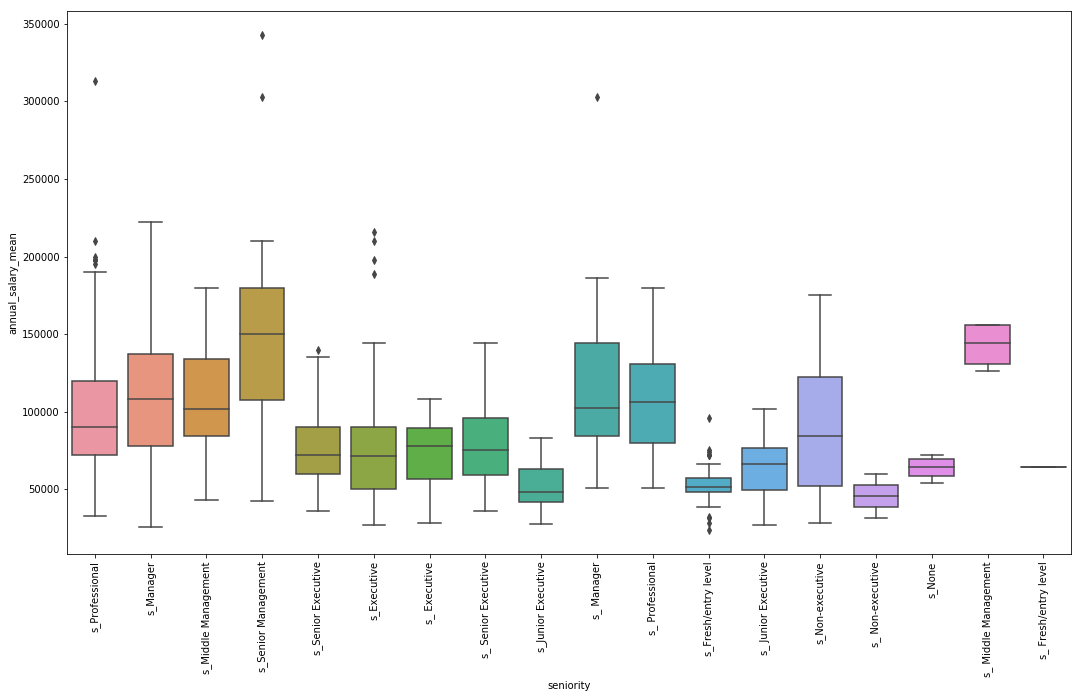

In [337]:
# lets do some plotting

position = []
annual_salary_mean = []

s_col = [col for col in df4.columns if "s_" in col]

for i, row in df4.iterrows():
    for each in s_col:
        if row[each] == 1:
            position.append(each)
            annual_salary_mean.append(row['annual_salary_mean'])
salary_plot = pd.DataFrame({'seniority': position, 'annual_salary_mean': annual_salary_mean})
fig = plt.figure(figsize=(18,10))
ax = sns.boxplot(x='seniority', y = 'annual_salary_mean', data = salary_plot)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()
#data looks a tad weird with so called "senior" positions not significantly being paid better as compared to the other seniorities


In [338]:
# lets drop seniority because I have managed to manually get dummies for that column
# lets try modelling from this
df4 = df4.drop('seniority', axis = 1)


In [339]:
# finding the unique industries 

list_all = list(df4['industry'])
list_all2 = [a.split(',') for a in list_all]
list_full = []
for a in list_all2:
    for b in a:
        list_full.append(b)
unique_list = np.unique(list_full)
print(len(unique_list))
unique_list

58


array([' Admin / Secretarial', ' Advertising / Media ',
       ' Banking and Finance', ' Consulting ', ' Customer Service',
       ' Education and Training', ' Engineering',
       ' Environment / Health  ', ' F&B', ' General Management',
       ' Healthcare / Pharmaceutical', ' Human Resources ',
       ' Information Technology', ' Insurance',
       ' Logistics / Supply Chain', ' Manufacturing',
       ' Marketing / Public Relations ', ' Others',
       ' Professional Services', ' Public / Civil Service',
       ' Purchasing / Merchandising', ' Repair and Maintenance',
       ' Risk Management', ' Sales / Retail ',
       ' Sciences / Laboratory / R&D', ' Telecommunications',
       ' Travel / Tourism', 'Accounting / Auditing / Taxation',
       'Admin / Secretarial', 'Advertising / Media ',
       'Architecture / Interior Design', 'Banking and Finance',
       'Building and Construction', 'Consulting ', 'Customer Service',
       'Design', 'Education and Training', 'Engineering',
  

In [340]:
# lets add all these industries as columns
prefix_col = ['i_'+ a for a in unique_list]
for name in prefix_col:
    df4[name] = 0
print(df4.shape)
df4.head()

(784, 82)


,search_key,role,company,industry,annual_salary_mean,job_combine,s_ Executive,s_ Fresh/entry level,s_ Junior Executive,s_ Manager,...,i_Marketing / Public Relations,i_Others,i_Professional Services,i_Public / Civil Service,i_Real Estate / Property Management,i_Risk Management,i_Sales / Retail,i_Sciences / Laboratory / R&D,i_Telecommunications,i_Travel / Tourism
0,data engineer,wd sap business system / analyst,autodesk asia pte. ltd.,Information Technology,91350.0,"Do what’s next', ' ', 'Would you like to Thin...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,data analytics,wd engineering manager,autodesk asia pte. ltd.,Information Technology,153600.0,"Position Overview', ' ', 'Are you passionate ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,data analytics,account manager (e-commerce),culina pte. ltd.,Sales / Retail,54000.0,"As the e-Commerce Manager, you will be reporti...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,data analytics,account manager,omd singapore pte. ltd.,Advertising / Media,78000.0,"[""The Account\xa0Manager\xa0uses data analytic...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,data analytics,account manager,omnicom public relations group pte. ltd.,Marketing / Public Relations,61800.0,"\xa0', ' ', '\xa0', ' ', '\xa0', ' ', '\xa0...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [341]:
for i, row in df4.iterrows():
    split = []
    split = row['industry'].split(',')
    for each in split:
        col = ""
        col = "i_" + each
        df4.loc[i,col] = 1
# by doing this, I created 58 columns instead of 91 when I get dummies. This is definitely more relevant
df4.head()

,search_key,role,company,industry,annual_salary_mean,job_combine,s_ Executive,s_ Fresh/entry level,s_ Junior Executive,s_ Manager,...,i_Marketing / Public Relations,i_Others,i_Professional Services,i_Public / Civil Service,i_Real Estate / Property Management,i_Risk Management,i_Sales / Retail,i_Sciences / Laboratory / R&D,i_Telecommunications,i_Travel / Tourism
0,data engineer,wd sap business system / analyst,autodesk asia pte. ltd.,Information Technology,91350.0,"Do what’s next', ' ', 'Would you like to Thin...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,data analytics,wd engineering manager,autodesk asia pte. ltd.,Information Technology,153600.0,"Position Overview', ' ', 'Are you passionate ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,data analytics,account manager (e-commerce),culina pte. ltd.,Sales / Retail,54000.0,"As the e-Commerce Manager, you will be reporti...",0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,data analytics,account manager,omd singapore pte. ltd.,Advertising / Media,78000.0,"[""The Account\xa0Manager\xa0uses data analytic...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,data analytics,account manager,omnicom public relations group pte. ltd.,Marketing / Public Relations,61800.0,"\xa0', ' ', '\xa0', ' ', '\xa0', ' ', '\xa0...",0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


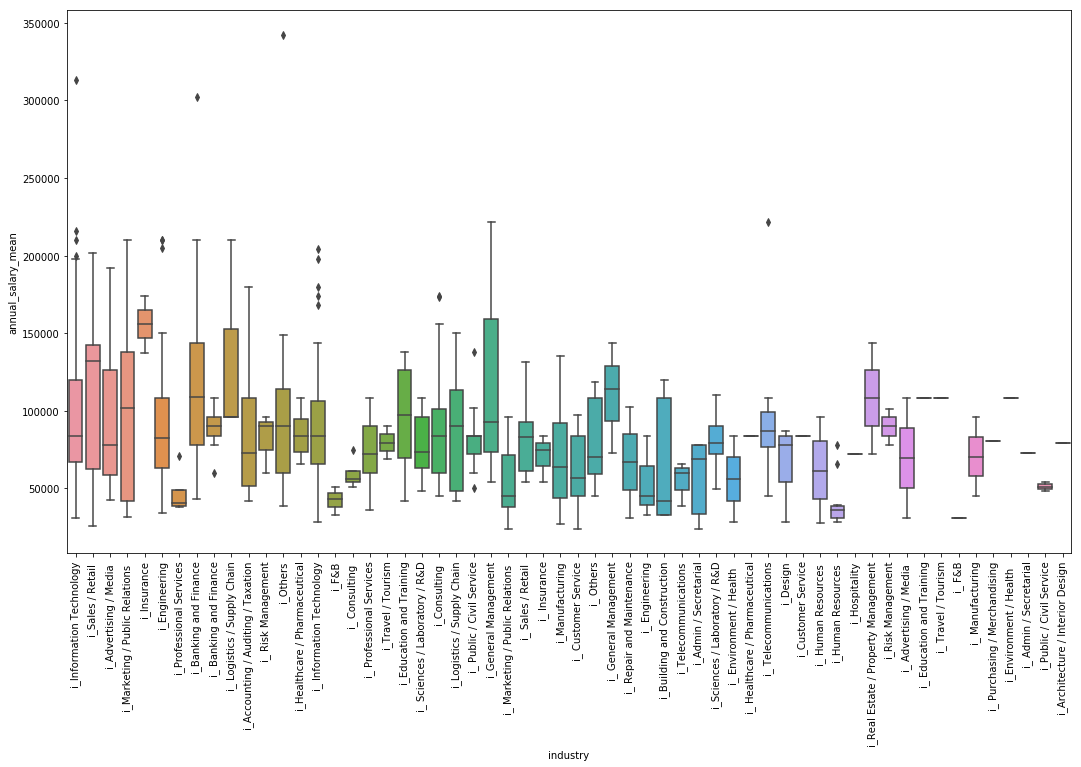

In [345]:
# lets do some plotting

industry2 = []
annual_salary_mean = []

i_col = [col for col in df4.columns if "i_" in col]

for i, row in df4.iterrows():
    for each in i_col:
        if row[each] == 1:
            industry2.append(each)
            annual_salary_mean.append(row['annual_salary_mean'])
industry_plot = pd.DataFrame({'industry': industry2, 'annual_salary_mean': annual_salary_mean})
fig = plt.figure(figsize=(18,10))
ax = sns.boxplot(x='industry', y = 'annual_salary_mean', data = industry_plot)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()
#data looks a tad weird with insurance industry seemingly paying better

In [349]:
# lets model. Hopefully the results will be better

df5 = df4.drop('role', axis = 1)
df5.head()


,search_key,company,industry,annual_salary_mean,job_combine,s_ Executive,s_ Fresh/entry level,s_ Junior Executive,s_ Manager,s_ Middle Management,...,i_Marketing / Public Relations,i_Others,i_Professional Services,i_Public / Civil Service,i_Real Estate / Property Management,i_Risk Management,i_Sales / Retail,i_Sciences / Laboratory / R&D,i_Telecommunications,i_Travel / Tourism
0,data engineer,autodesk asia pte. ltd.,Information Technology,91350.0,"Do what’s next', ' ', 'Would you like to Thin...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,data analytics,autodesk asia pte. ltd.,Information Technology,153600.0,"Position Overview', ' ', 'Are you passionate ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,data analytics,culina pte. ltd.,Sales / Retail,54000.0,"As the e-Commerce Manager, you will be reporti...",0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,data analytics,omd singapore pte. ltd.,Advertising / Media,78000.0,"[""The Account\xa0Manager\xa0uses data analytic...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,data analytics,omnicom public relations group pte. ltd.,Marketing / Public Relations,61800.0,"\xa0', ' ', '\xa0', ' ', '\xa0', ' ', '\xa0...",0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [352]:
y5 = df5['annual_salary_mean']
X5 = df5[['search_key','company']]
X5 = pd.get_dummies(X5)
print(X5.shape)
X5.head()

(784, 380)


,search_key_big data,search_key_business analytics,search_key_business intelligence,search_key_data analyst,search_key_data analytics,search_key_data architect,search_key_data consultant,search_key_data engineer,search_key_data lead,search_key_data manager,...,company_xypher pte. ltd.,company_yamato izakaya (pte. ltd.),company_yaoya fresh energy pte. ltd.,company_zalora south east asia pte. ltd.,company_zave technology pte. ltd.,company_zeemart pte. ltd.,company_zendesk singapore pte. ltd.,company_zenika pte. ltd.,company_zenyum pte. ltd.,company_zhao yang geotechnic pte ltd
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [358]:
cvt = CountVectorizer(stop_words=stop,lowercase=True, strip_accents="unicode", max_features = 1000, min_df = 50, ngram_range = (2,4))
X_all = cvt.fit_transform(df5['job_combine'])
columns  =  np.array(cvt.get_feature_names())
nlp3 = pd.DataFrame(cvt.transform(df5['job_combine']).todense(), columns = cvt.get_feature_names())
print(nlp2.shape)

freq_words = get_freq_words(X_all, columns)
freq_words[:30]

(974, 118)


machine learning           519
data analytics             444
big data                   389
computer science           301
data science               280
years experience           251
communication skills       248
problem solving            200
experience working         197
project management         172
best practices             144
work closely               141
bachelor degree            133
skills ability             126
team members               125
least years                123
ability work               123
experience data            121
business intelligence      119
team player                111
data driven                111
degree computer            108
data analysis              103
degree computer science    103
software development       102
hands experience           100
deep learning              100
solving skills              94
problem solving skills      94
data management             93
dtype: int64

In [359]:
df5.head()

,search_key,company,industry,annual_salary_mean,job_combine,s_ Executive,s_ Fresh/entry level,s_ Junior Executive,s_ Manager,s_ Middle Management,...,i_Marketing / Public Relations,i_Others,i_Professional Services,i_Public / Civil Service,i_Real Estate / Property Management,i_Risk Management,i_Sales / Retail,i_Sciences / Laboratory / R&D,i_Telecommunications,i_Travel / Tourism
0,data engineer,autodesk asia pte. ltd.,Information Technology,91350.0,"Do what’s next', ' ', 'Would you like to Thin...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,data analytics,autodesk asia pte. ltd.,Information Technology,153600.0,"Position Overview', ' ', 'Are you passionate ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,data analytics,culina pte. ltd.,Sales / Retail,54000.0,"As the e-Commerce Manager, you will be reporti...",0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,data analytics,omd singapore pte. ltd.,Advertising / Media,78000.0,"[""The Account\xa0Manager\xa0uses data analytic...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,data analytics,omnicom public relations group pte. ltd.,Marketing / Public Relations,61800.0,"\xa0', ' ', '\xa0', ' ', '\xa0', ' ', '\xa0...",0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [362]:
df5_2 = df5.drop(['search_key','company','annual_salary_mean','job_combine','industry'], axis = 1)

X6 = pd.concat([X5,nlp3,df5_2], axis = 1)
print(X6.shape)
X6.head()
# reduced from 1300+ to 500+ columns 

(784, 539)


,search_key_big data,search_key_business analytics,search_key_business intelligence,search_key_data analyst,search_key_data analytics,search_key_data architect,search_key_data consultant,search_key_data engineer,search_key_data lead,search_key_data manager,...,i_Marketing / Public Relations,i_Others,i_Professional Services,i_Public / Civil Service,i_Real Estate / Property Management,i_Risk Management,i_Sales / Retail,i_Sciences / Laboratory / R&D,i_Telecommunications,i_Travel / Tourism
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [439]:
lassoregcv = LassoCV(n_alphas=10, normalize=True, random_state=1, max_iter=10000, cv = 5)
lassoregcv.fit(X6, y5)
print(lassoregcv.alpha_)

26.305018462274735


In [440]:
l_new = Lasso(alpha=lassoregcv.alpha_)
l_new.fit(X6, y5)

scores = cross_val_score(l_new, X6, y5, cv = 5)
print(np.mean(scores),np.std(scores),scores)
# scores are still not great but at least they have improved to > 1

0.2789852272110469 0.1602135441950763 [0.0255178  0.24121065 0.41552619 0.2297269  0.4829446 ]


In [441]:
# try ridge

alpha_range = np.logspace(-1, 1, 100)
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X6, y5)
print(ridgeregcv.alpha_)

r_new = Ridge(alpha=ridgeregcv.alpha_)
r_new.fit(X6, y5)

scores = cross_val_score(r_new, X6, y5, cv = 5)
print(np.mean(scores),np.std(scores),scores)
# scores are still not great. Ridge is still better


0.2535364493970112
0.2254417247127738 0.1825924760861591 [-0.08290203  0.2314357   0.31014946  0.1915588   0.4769667 ]


In [431]:
# curious what are the important columns for lasso which is my better scoring model

lasso_coefs = pd.DataFrame({'variable':X6.columns,'coef':l_new.coef_,'abs_coef':np.abs(l_new.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

# looks badly overfitting and probably should delete the company column. Lets try

,variable,coef,abs_coef
288,company_s.w.i.f.t. terminal services pte. ltd.,128737.764821,128737.764821
197,company_klare services singapore pte. ltd.,115119.910473,115119.910473
214,company_marks sattin (singapore) pte. limited,103546.782105,103546.782105
42,company_aspentech pte. ltd.,99642.102680,99642.102680
36,company_amazon web services singapore private ...,93294.733314,93294.733314
170,company_hp pps asia pacific pte. ltd.,87643.793835,87643.793835
132,company_fourth paradigm southeast asia pte. ltd.,76353.544969,76353.544969
84,company_cisco systems (usa) pte. ltd.,71373.875073,71373.875073
29,company_airbnb singapore private limited,58422.218795,58422.218795
150,company_google asia pacific pte. ltd.,55679.357199,55679.357199


In [463]:
X5_2 = df5[['search_key']]
X5_2 = pd.get_dummies(X5_2)

X6_2 = pd.concat([X5_2, nlp3,df5_2], axis = 1)
print(X6_2.shape)

lassoregcv = LassoCV(n_alphas=10, normalize=True, random_state=1, max_iter=10000, cv = 5)
lassoregcv.fit(X6_2, y5)
print(lassoregcv.alpha_)

l_new = Lasso(alpha=lassoregcv.alpha_)
l_new.fit(X6_2, y5)

scores = cross_val_score(l_new, X6_2, y5, cv = 5)
print(np.mean(scores),np.std(scores),scores)
# scores are still not great but at least they have improved to > 1

(784, 177)
56.672444297053865
0.24141749705332796 0.1581801349193281 [0.07639475 0.21253335 0.38523771 0.07268341 0.46023827]


In [464]:
lasso_coefs = pd.DataFrame({'variable':X6_2.columns,'coef':l_new.coef_,'abs_coef':np.abs(l_new.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

# this makes alot more sense... 

,variable,coef,abs_coef
118,s_Senior Management,55836.970818,55836.970818
123,i_ Customer Service,-31098.582020,31098.582020
110,s_Fresh/entry level,-26780.263644,26780.263644
150,i_Banking and Finance,26747.823801,26747.823801
18,10 years,24448.951233,24448.951233
111,s_Junior Executive,-23926.971216,23926.971216
158,i_F&B,-23697.586992,23697.586992
125,i_ Engineering,-22547.256484,22547.256484
5,search_key_data architect,22076.218497,22076.218497
112,s_Manager,20505.481567,20505.481567


# Top factors influencing salary
1. Seniority - being hired to a senior management position affects pay significantly
2. Experience - similarly to 1, if the company requires 10 years of working experience, typicall you will be better paid
3. Industries such as (a) banking and finance generally pay more
4. Being in a role related to data architecture also pays more
5. Many of these jobs also require strong communication skills 

# QUESTION 2

### What components of a job posting distinguish data scientists from other data jobs?

In [401]:
y7 = pd.get_dummies(df4['search_key'])['data scientist']
X7 = nlp3
headers = X7.columns 

In [403]:
sm = SMOTE(random_state=12, ratio = 1.0)
X8, y8 = sm.fit_sample(X7, y7)
print(len(X8), len(y8))
X8 = pd.DataFrame(X8)
X8.columns = X7.columns

1478 1478


In [404]:

lr = LogisticRegression()
lr.fit(X8, y8)

gs_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.logspace(-5,0,5)
}

lr_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=5, verbose=1)
lr_gridsearch.fit(X8, y8)
print(lr_gridsearch.best_params_)

/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


In [405]:
scores = cross_val_score(lr_gridsearch, X8, y8, cv = 5,scoring = 'roc_auc')
print("scores are:", scores)
print("mean:",np.mean(scores), "std:",np.std(scores))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
scores are: [0.93875548 0.90914901 0.97381757 0.981145   0.98130409]
mean: 0.9568342285011578 std: 0.02856200999521855


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


### without upsampling this. The result was very poor. This shows a large improvement. 
### Lets find out the most important factors 

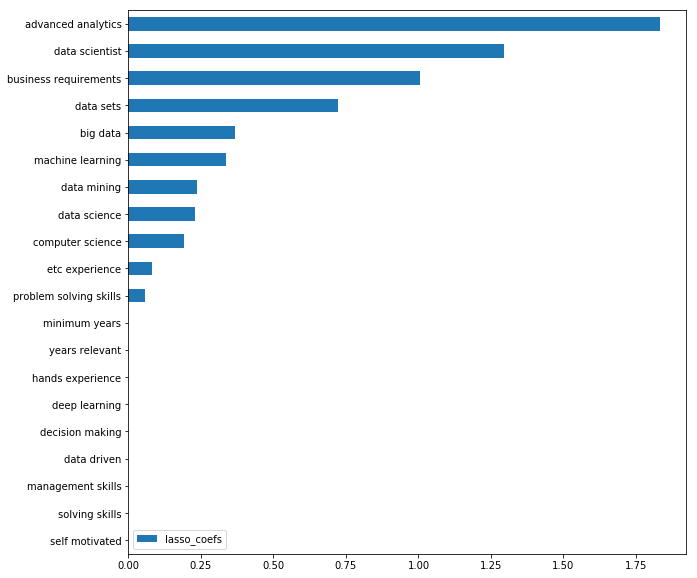

In [429]:
# {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
lrcv = LogisticRegressionCV(penalty='l1', Cs=100, cv=5, solver='liblinear')
lrcv.fit(X8, y8)

coeffs = pd.DataFrame(lrcv.coef_, columns=X8.columns)
coeffs_t = coeffs.transpose()
coeffs_t.columns = ['lasso_coefs']
coeffs_abs = coeffs_t.abs().sort_values('lasso_coefs', ascending=False)

ax = coeffs_t.sort_values('lasso_coefs', ascending = True).tail(20).plot(kind='barh',figsize=(10,10))




# The skills relevant to a data scientist role is 
1. Advanced Analytics
2. Being able to understand biz requirements well
3. Able to look at data sets and even big data
4. Able to do machine learning
5. Able to do data mining

In [461]:
# lets try a different model


rf = RandomForestClassifier()
rf.fit(X8, y8)

gs_params = {
    'max_depth' : [5],
    'min_samples_leaf': [25]
}

rf_gridsearch = GridSearchCV(RandomForestClassifier(), gs_params, cv=5, verbose=1)
rf_gridsearch.fit(X8, y8)
print(rf_gridsearch.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'max_depth': 5, 'min_samples_leaf': 25}


/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 

In [462]:
scores = cross_val_score(rf_gridsearch, X8, y8, cv = 5,scoring = 'roc_auc')
print("scores are:", scores)
print("mean:",np.mean(scores), "std:",np.std(scores))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
scores are: [0.9330031  0.86271914 0.93446402 0.93960007 0.90996807]
mean: 0.9159508818509291 std: 0.02850337384152266


/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
/Users/nicholastay/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10

# SUMMARY

Approach with scraping: This is pretty straight forward where I first scrapped the links at careersfuture.sg a job portal in Singapore for jobs that were related to the data field (eg. Data scientist, data analysts etc). Thereafter, went to every link and then scrapped the contents in each link. Total content scrapped was about 1200+ rows after deleting repetitions. 

Approach with Q1: 

•	General Approach was to quickly start modelling and then iterate and improve from there

•	Started with basic cleaning to clear weird notation that I got from scrapping and also to standardize salaries to annual salaries. Thereafter also feature engineered the mean salary that will be my target y variable. 

•	With this, used count vectorize to create a simple model with all the features included to the model. Baseline was terrible at an r score of -0.4 that is worse if I just took the mean of the sample

•	Started to clean my data more by improving my classification of seniority and industry. This reduced the features as compared to what I did previously. 

•	Thereafter ran Lasso and Ridge on my models which gave me a significantly better score as compared to what I got previously. Still the prediction ability is not high at an R score of 0.2+. This was however a marked improvement from my initial test score. Tried both Lasso and Ridge. Further tuning the model when the coefficient that I got didn’t make sense, hence dropped the company feature

•	In the end, used a Lasso model that countvectorized the role description and role requirements with seniority and industry and search key features that were used to predict the annual salary. Got a 0.24 R score in the end. 

•	Most important coeffecients driving higher pay are (1) Seniority (2) Long work experience (3) Being in the industry of banking and finance

•	Limitation 1: Perhaps, regression should not have been used for Q1 and potentially classification could be a better choice

•	Limitation 2: Should have done a train_test_split to create a holdout set but data did not seem to be sufficient

•	Limitation 3: Should have tried TFIDF or stemming that could have helped to produce better results

Approach with Q2: 

•	Want to answer the question of what components of a job distinguished a data scientist from other jobs. 

•	Distinguished data scientist jobs against the rest by using the search key that I used when searching all the different roles previously. 

•	As a minority class of just 42 values, I initially tried to predict the role without upsampling and the result was very bad with an AUC of 0.5. 

•	Subsequently improved this with upsampling and got an AUC of 0.95. Tried both the logistic regression and random forest and the logistic regression was the better performer

•	Most important coeffecients driving role of a data scientist is (1) Ability in advanced analytics (2) Being able to understand business requirements well (3) Able to look at big data

•	Limitation 1: Should have done a train_test_split to create a holdout set but data did not seem to be sufficient. This would have been even more important here but the target y values were less than 10%. 


# APPENDIX: TFIDF

In [ ]:
cvt = TfidfVectorizer(stop_words="english",lowercase=True, strip_accents="unicode", max_features = 2000, min_df = 5,max_df = 0.7, ngram_range = (1,2))
X_all = cvt.fit_transform(X['job_combine'])
nlp4 = pd.DataFrame(cvt.transform(X['job_combine']).todense(), columns = cvt.get_feature_names())
print(nlp.shape)

In [ ]:
freq_words = get_freq_words(X_all, columns)
freq_words[:20]

In [ ]:
# lets look at years of experience and convert them to integers

print(df3['years_exp'].value_counts())
df3.loc[3,'years_exp'].split()[0]
for i, row in df3.iterrows():
    df3.loc[i,'years_exp'] = row['years_exp'].split()[0]
print(df3['years_exp'].value_counts())



In [ ]:
# replacing the 'None' strings with np.NaN
df3['years_exp'].replace('None', np.NaN, inplace=True)
df3.head()

In [ ]:
df4 = df3[['years_exp','seniority']].dropna()
# df4.reset_index(inplace = True)
#df4.drop(['index'], axis = 1, inplace = True)
df4['years_exp'] = df4[['years_exp']].astype('float')
df4.groupby('seniority')['years_exp'].agg(['mean','count'])
#df_temp = df4.groupby('seniority').sum()
#df_temp['count'] = df3[['years_exp','seniority']].groupby('seniority').count()
#df4.groupby('seniority').agg(['sum','count'])
#group by seniority. Lets test it
#df3[df3['years_exp'] != np.NaN]
# df.groupby(['City','Shape Reported']).size().head()

In [ ]:
sns.boxplot(df2[['annual_salary_max']])

# Back to drawing board and more data cleaning..  

In [ ]:
# lets try and deal with seniority
seniority = pd.DataFrame(df3['seniority'].value_counts())
seniority

In [ ]:
# listing down roles that are just weird. They are a combination of junior and senior that don't make sense

seniority_errors = ['Manager, Fresh/entry level, Senior Executive',
                    'Executive, Non-executive, Junior Executive',
                    'Fresh/entry level, Executive, Senior Executive',
                    'Professional, Executive, Junior Executive',
                    'Fresh/entry level, Junior Executive, Senior Executive',
                    'Manager, Professional, Executive, Junior Executive, Senior Executive',
                    'Manager, Professional, Executive, Junior Executive',
                    'Executive, Junior Executive, Senior Executive',
                    'Professional, Executive, Junior Executive, Senior Executive']
seniority_errors_index = df3[df3['seniority'].isin(seniority_errors)].index 
df3.drop(seniority_errors_index, axis = 0, inplace = True)

In [ ]:
# lets see the revised
seniority = pd.DataFrame(df3['seniority'].value_counts())
seniority

In [ ]:
df3['job_combine'].replace('xa0','')
df3['job_combine'].replace("'\\xa0'",'')
df3['job_combine'].replace("\\t",'')
df3.loc[0,'job_combine']